In [3]:
from math import * 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from tqdm.notebook import tqdm
%matplotlib inline

In [4]:
def Save(obj, doc_path = '.', save_name = 'pkl_file'):
    model_name = save_name + '.pkl' 
    with open(doc_path+ '/'+ model_name, 'wb') as file:
        pickle.dump(obj, file)     

def Read_pickle(doc_path):
        with open(doc_path, 'rb') as file:
            result = pickle.load(file)  
        return result

# OpenCV

## 计算机眼中的图像：计算机视觉

**Def 1.1.1 RGB颜色通道与RGB值** 一张**彩色图片**通常是由很多微小的彩色像素 **(pixels)** 组成的，这些像素的颜色又由一个三元数组 **(R,G,B)** 决定。其中R,G,B分别代表红，绿，蓝的三原色通道 **(channels)**；数组 **(R,G,B)** 的值代表在对应颜色通道上的亮度，取值范围 **0 ~ 255**，越大的值代表**越高的亮度**。一般我们用**三张同样大小的矩阵**来代表一张彩色图片，如下图所示；特别的，一张黑白图片**(灰度图)**只有一条颜色通道。

<div align="center">
<img src=https://pic4.zhimg.com/80/v2-94eda292fdc88e4aa34b351d4b1be963_720w.webp width=60% height=60%/>
</div>

## OpenCV库 (cv2)

OpenCV的全称是 **Open Source Computer Vision Library**，是一个跨平台的计算机视觉库，可以在商业和研究领域中免费使用。OpenCV可用于开发实时的图像处理、计算机视觉以及模式识别程序。在Python中使用OpenCV，首先导入**cv2**库。

In [2]:
import cv2

### 图像读取与输出

In [3]:
# 读取图片
img = cv2.imread('./Notes_OpenCV/Lenna.png') # 以3DArray的形式返回图片的BGR矩阵
B = img[:,:,0] # B
G = img[:,:,1] # G
R = img[:,:,2] # R 

# 等价操作
B, G, R = cv2.split(img)

# 逆向操作
img_merge = cv2.merge((B,G,R)) # 注意(B,G,R)外有括号

# 生成图像副本
img_copy = img.copy() # 实际上是numpy中array的复制

注意此处，**cv2.imread(filename, flags=None)** 返回的是 <span style="color: red;">**(B,G,R)**</span> 而不是 **(R,G,B)**，但  **matplotlib** 里面是 **(R,G,B)**。此外，我们还可以通过参数 **flags** 设定读入图片的格式：   
**cv2.IMREAD_COLOR**    ：读入一副彩色图像。图像的透明度会被忽略，这是默认参数    
**cv2.IMREAD_GRAYSCALE**：以灰度模式读入图像，此时仅返回一个矩阵   
**cv2.IMREAD_UNCHANGED**：保留读取图片原有的颜色通道     

In [4]:
# 显示图片
def cv_show(name, img, wait_time=5000):
    cv2.imshow(name, img)   # 在窗口中显示图像，窗口名称为 name (str)，这里可以通过imutils模块改变图像显示大小
    cv2.waitKey(wait_time)  # 窗口显示时间，毫秒级；wait_time = 0 表示按任意键关闭窗口，不主动关闭
    cv2.destroyAllWindows() # 关闭时同时关闭所有窗口
    return
    
cv_show('Lenna', img)   

**cv2.imshow(name, img)**   中的参数二**img**为图像对象，类型是numpy中的ndarray类型   
**cv2.waitKey(wait_time)**  中的参数取 **wait_time = 0** 表示按任意键关闭窗口，不主动关闭，它必须接在 **cv2.imshow** 后面
**cv2.destroyAllWindows()** 指定关闭窗口的操作必须接在 **cv2.waitKey** 后面  
     
实际上，**cv2.waitKey(wait_time)** 的本质是表示<span style="color: red;">**暂停程序，在wait_time期间等待一个按键输入**</span>，如果超出预期时间，则跳过该行代码继续运行；**wait_time = 0** 实际表示**无限期暂停程序直至接收到按键输入**。同时，**cv2.waitKey(wait_time)** 也有返回值，如果在规定时间内接收到按键输入，则返回值为输入按键的**ASCII码**，否则返回**-1**，见下方代码：

In [11]:
def cv_show(name, img, wait_time=5000):
    cv2.imshow(name, img)  
    inputKey = cv2.waitKey(wait_time)  # 输出在在wait_time期间接收到的按键输入
    cv2.destroyAllWindows() 
    return inputKey                    # 输出在在wait_time期间接收到的按键输入
    
cv_show('Lenna', img)                  

27

在上述代码块图片展示期间，按ESC键退出，所以返回值为27（ESC键对应的ASCII码）。

当然，也可以使用 **matplotlib** 显示图片，采用 **plt.imshow(img_RGB)** 即可，但注意，**img_RGB** 是一个表示 <span style="color: red;">**(R,G,B)**</span> 的3DArray，而非 **cv2.imread(filename, flags=None)** 返回的 <span style="color: red;">**(B,G,R)**</span>，利用 **cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)** 可以实现二者的转换：

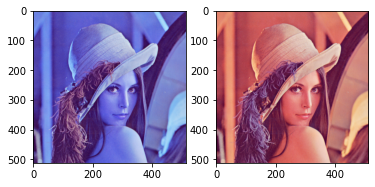

In [6]:
plt.subplot(121) # 左图为没有经过转换的输出
plt.imshow(img);
plt.subplot(122) # 右图为经过转换的输出
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [11]:
# 保存图片
imgGray = cv2.imread('./Notes_OpenCV/Lenna.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./Notes_OpenCV/Lenna_Gray.png', imgGray)

True

### 视频的读取与输出

视频的实际上是有多张静态图片，即 **帧 (frame)** 组合而成，读取视频相当于读取一条图片序列

In [6]:
# 读取视频
videoCap = cv2.VideoCapture('./Notes_OpenCV/Ocean.mp4') # 初始化读取视频（摄像头）
videoCap.isOpened()                                     # 检查初始化摄像头是否成功，否则下面的代码都会报错

True

**videoCap.isOpened()** 会返回一个布尔值，判断当前的摄像头是否初始化成功，如果摄像头初始化失败，我们可以使用 **videoCap.open()** 函数来打开摄像头。我们将读取视频的整个过程封装成如下函数

In [7]:
def read_video(video_path):  
    frames = []                             # 用于保存读取的帧
    videoCap = cv2.VideoCapture(video_path) # 初始化读取视频（摄像头）
    isOpen = videoCap.isOpened()            # 检查初始化摄像头是否成功，否则下面的代码都会报错
    
    while isOpen:
        isOpen , frame = videoCap.read()    # 读取下一帧
        if isOpen:
            frames.append(frame)            # 添加该帧
        
    videoCap.release()                      # 关闭视频文件或相机设备
    return frames

**videoCap = cv2.VideoCapture(video_path)** -- 初始化所读取的视频     
**videoCap.isOpened()** -- 返回一个布尔值，判断当前的视频是否初始化成功    
**videoCap.read()** -- 返回一个布尔值 **isOpen** 表示帧是否被正确读取,可以通过检查这个返回值来判断视频是否结束；一个被读取帧的BGRarray **frame**     
**videoCap.release()** -- 用于关闭视频文件或相机设备，常用于结束对视频的操作时

In [8]:
# 显示视频
def frames_show(name, frames, wait_time=100):
    for frame in frames:
        cv2.imshow(name, frame)
        inputKey = cv2.waitKey(wait_time)
        if  inputKey == 27 :
            break
    cv2.destroyAllWindows() 
    return

In [16]:
# 将所有帧转为灰度图
frames = read_video('./Notes_OpenCV/Ocean.mp4')
Grayframes = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames] # cv2.cvtColor()可以实现图片的各种转换

# 尝试调节不同的wait_time以实现视频的加减速
frames_show('Ocean_Gray_wait_time_10', Grayframes, wait_time=10)
frames_show('Ocean_Gray_wait_time_50', Grayframes, wait_time=50)

为了方便视频的保存，通常将读取帧和显示帧的操作置于同一循环下。

# 神经网络 Neural Networks
## 前馈神经网络 Feedforward Neural Networks FNN
### 前馈神经网络的定义 Definition

A feed-forward neural network $f(\cdot , \theta)$ is a **directed acyclic graph**, parametrized by $\theta$, that applies a series of transformation to an input $\mathbf{x} \in \mathbb{R}^d$, layer-wise, and without recursion, to
produce an output $y = f(\mathbf{x}, \theta) \in \mathbb{R}^s$ , as depicted in below.

<p align="center\">
<img src=".\Notes_NN\layer_wise_fnn.png\" width="550" title="Layer computation in a feed-forward neural network">
    
Given a $K$ layer network, the $k$-th layer is characterized by a function $f_k$ parametrized by $\theta_k$. In other words,     
    
$$f(\mathbf{x}, \theta) = f_K(\dots f_2(f_1(\mathbf{x}; \theta_1); \theta_2) \dots; \theta_K)$$
    
The $f_k$'s are of the form
$$f_k(\mathbf{z}_{k-1}; \theta_k) = \mathbf{z}_k = \sigma_k(\mathbf{q}_{k-1}) = \sigma_k(\mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k)$$
    
where $\theta_k = \{\mathbf{W}_k, \mathbf{b}_k\}$, $\mathbf{W}_k \in \mathbb{R}^{h_k\times h_{k-1}}$ is known as the **weight matrix**, $\mathbf{b}_k \in \mathbb{R}^{h_k}$ is the **bias vector**, $\mathbf{z}_k \in \mathbb{R}^{h_k}$ is the output of the $k$-th layer, $h_k$ is the dimension (the number of neurons) of the $k$-th layer, $\sigma_k$ is **point-wise operator** known as **activation function** of the layer, and $\mathbf{q}_k$ is the **pre-activation vector**.

Typical **activation functions** include: 
- **tanh**: $x \mapsto \frac{\exp(2x) -1 }{\exp(2x) + 1}$,
- **sigmoid**: $x \mapsto \frac{1}{\exp(-x) + 1}$,
- **ReLU**:  $x \mapsto \max(0,x)$ (The Rectified Linear Unit ),
- **SoftMax**:  $\mathbf{x} \in \mathbb{R}^d  \mapsto [\dots, \frac{\exp(\mathbf{x}[i])}{\sum_{j=1}^d \exp(\mathbf{x}[j])}, \dots]$, <span style="color: red;">**常用于多元分类，可以视为“概率”**</span>,
- **LogSoftMax**:  $\mathbf{x} \in \mathbb{R}^d  \mapsto [\dots, \log{\frac{\exp(\mathbf{x}[i])}{\sum_{j=1}^d \exp(\mathbf{x}[j])}}, \dots]$, <span style="color: red;">**常用于多元分类，可以视为“log概率”，与 NNLLoss 联用**</span>。

Given an output $\mathbf{z} \in \mathbb{R}^s$ and a ground-truth $\mathbf{y} \in \mathbb{R}^s$, commonly used **loss functions** are:
- **MSE**: $(\mathbf{z}, \mathbf{y}) \mapsto \|\mathbf{z} - \mathbf{y}\|_2^2$, (Mean Squared Error),
- **MAE**: $(\mathbf{z}, \mathbf{y}) \mapsto \|\mathbf{z} - \mathbf{y}\|_1$, (Mean Absolute Error),
- **CE**: $(\mathbf{z}, \mathbf{y}) \mapsto - \langle \mathbf{y}, \log\mathbf{z} \rangle = - \sum_i \mathbf{y}[i] \log \mathbf{z}[i] $, (Cross-entropy),
- **NNL**: $(\mathbf{z}, i) \in \mathbb{R}^d * \mathbb{R} \mapsto -\mathbf{z[i]}$, (Negative-loglikelihood)

note, a **softmax** function should not be used in the final layer of the network when using **CrossEntropy**：
- 效率：CrossEntropyLoss 在内部自动执行了 softmax 操作。因此，如果在网络的最后一层额外添加了一个 softmax 层，你其实就做了两次 softmax，这是没有必要的，会导致计算效率下降。

- 数值稳定性：另一个原因是数值稳定性。softmax 函数会将输出转换为概率，这可能会导致数值范围的丧失（因为概率的范围是0到1）。这可能会导致数值稳定性问题，特别是在计算损失的对数部分时。而 PyTorch 的 CrossEntropyLoss 在内部处理了这个问题，可以确保数值的稳定性。

因此，如果你使用的损失函数是 CrossEntropyLoss，你应该让网络的最后一层直接输出原始的、未归一化的分数（ 即 logits ），而不是通过 softmax 函数转换的概率。   
    
    
**Illustration of a FNN**
<p align="center\">
<img src=".\Notes_NN\fnn_example.png\" width="450" title="Graphical view of a FNN">
</p>  

### 逆误差传播算法 Back-propagation

Given a set of network parameter $\theta$, and a dataset $\mathcal{D} = \{\mathbf{x}_i \in \mathbb{R}^d, \mathbf{y}_i \in \mathbb{R}^s\}$, the goal is to optimize the following function

$$
\underset{\theta}{ \text{ min } } \Big[ \ell(\theta) =  \frac{1}{n} \sum_{i=1}^n loss(f(\mathbf{x}_i; \theta), \mathbf{y}_i) \Big]
$$

Not only is the problem  in high dimension, it is also non-convex. Therefore, $\theta$ is updated iteratively based on first order information (the gradient) so as to reach a (local) minimum.

Let $\theta^t$ be the value of $\theta$ at the $t$-th iteration, $\theta^0$ being the initialization of the parameters of the network, the update rule of the standard gradient descent  is as follows,

$$
\theta^{t+1} \leftarrow \theta^{t} - \eta \nabla_{\theta^{t}}\ell(\theta^{t}) ,
$$

where $\nabla_{\theta} \ell(\theta)$ is the **gradient** of $\ell$ w.r.t to $\theta$, and $\eta$ is the 
step-size also known as **learning rate**. The parameters in $\theta$ are updated sequentially layer after another,
starting with the output one, by back-propagating the loss value, as illustrated in the figure below.

<p align="center">
<img src=".\Notes_NN\layer_wise_fnn_bprop.png" width="750" title="Back-propagation">
    
The **learning rate** is usually chosen experimentally based on the figure below. In practice, various different variants of gradient descent are used, and are built in functions into both pytorch and tensorflow. Some commonly used optimisers are:
- Stochastic gradient descent (SGD)
- Adadelta
- Adam
    
    <p align="center">
<img src=".\Notes_NN\learningrates.jpeg" width="350" title="Back-propagation">
        
*epoch* 是一个术语，指的是网络完成一次完整的遍历训练集并对参数进行更新的过程。

### 其他术语与标准训练流程 Terminologies & Standard Training Process
#### 张量 Tensor
**"Tensor"** 是在深度学习中广泛使用的一种数据结构，它是矩阵和向量概念的一个高维扩展，在tensorFlow和PyTorch中是被<span style="color: red;">**作为tensor变量存储的一个多维数组，可以被索引**</span>。在形状上，tensor可以是0维（标量）、1维（向量）、2维（矩阵）、或者更高维度。比如，一张彩色图片可以被表示为一个3维tensor，其中三个维度分别对应图片的高度、宽度以及颜色通道（通常为红、绿、蓝三个颜色通道）。再如，一段视频可以被表示为一个4维tensor，四个维度分别对应时间、高度、宽度以及颜色通道。

特别的，一组数据也可以视为一个tensor，其第一个axis表示单个数据的下标，余下的axes表示该数据/tensor的各个维度。可以使用下面的命令创建一个简单的tensor，其维度为2，所有元素均为0。

In [2]:
import torch

tensor_example = torch.zeros((2, 3)) # 创建一个2x3的张量，初始化为0

print(tensor_example)
print(tensor_example.size())         # 查询tensor的维度

tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])


#### 数据集的拆分与功能 Separate the data into three folds
在机器学习和深度学习中，我们通常将数据集分为三个部分：**训练集（Training Set）**、**验证集（Validation Set）**和**测试集（Test Set）**。

**验证集**是用来在模型训练过程中**进行性能评估和调整模型超参数的数据集**。验证集在训练过程中起到一个“中间人”的角色。具体来说，我们使用训练集来训练模型，然后在验证集上评估模型的性能，并根据验证集的表现来调整模型的超参数（如学习率、正则化参数等）。这样做的目的是为了防止模型过拟合训练数据。如果我们只有训练集和测试集，那么在调整模型和超参数时，我们可能会**过度依赖测试集的表现，这可能导致模型过拟合测试集**。验证集提供了一种在训练过程中评估模型的方法，而不必依赖测试集。

最后，一旦我们的**模型参数和超参数调整到最佳状态**，我们会在**测试集**上进行最后的评估，这可以提供一个公正的、未见过的数据集对模型性能进行评估，这也更接近模型在实际环境中的表现。

<p align="center\">
<img src=".\Notes_NN\datasep.png" width="350" title="Dataset separation." >
</p>


Assessing the model performance on the validation set

<p align="center">
<img src=".\Notes_NN\accuracies.jpeg" width="350" title="Dataset separation." >
</p>

## 前馈神经网络实例 MNIST Classification
**MNIST**数据集是一个手写数字识别的数据集，包含了6万张28x28像素的训练图像和1万张测试图像，每张图像都是一个0-9的手写数字。We will have a dataset $ \mathcal{D} = \{ (x_i,y_i) \}$ of $n$ images $x_i$ and $n$ associated labels $y_i$, with $y_i = \{0, 1, \cdots, 9\}$, $i=1,\cdots,n$.

下面这段代码是使用PyTorch的一个子库torchvision来加载MNIST数据集。torchvision是一个用于计算机视觉的库，它包含了很多著名的数据集、模型结构和图像转换工具。

### 获取训练集和测试集

In [221]:
from torchvision import datasets
import torchvision.transforms as T

In [222]:
# 创建一个MNIST数据集的实例，它将作为训练数据。
train_data = datasets.MNIST(
    root = 'data', # 指定数据集的根目录。这意味着数据集将会被下载到这个目录中，或者如果数据集已经存在，它将在这个目录中被找到。
    train = True,  # 指定我们需要训练集。MNIST数据集包含训练集和测试集，通过设置这个参数为True，我们表明我们需要训练集。                      
    transform = T.ToTensor(), # 指定了一个转换，将图像转换为张量。这是一个常见的转换，因为神经网络通常使用tensor作为输入。
    download = True)        # 如果数据集不在root指定的目录中，通过设置这个参数为True，代码会自动下载数据集。

# 与上面类似，但这里创建了一个MNIST数据集的实例作为测试数据。
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = T.ToTensor() )

**T.ToTensor()** 可以把PIL-Image或者NumPy的ndarray转换为PyTorch的张量变量**(tensor)**，并且自动把像素值的范围从[0, 255]缩放到[0.0, 1.0]。

In [215]:
#print train_data
print(train_data, end='\n\n') # train_data的结构为一个可迭代对象，第i个元素为（ feature_data , label ）

#print test_data
print(test_data, end='\n\n')

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()



torch.Size([60000, 28, 28])

torch.Size([60000])



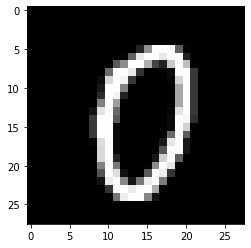

In [23]:
print(train_data.data.size(), end='\n\n')    # train_data.data 是一个包含了所有样本特征的tensor，第一个axis表示数据下标
print(train_data.targets.size(), end='\n\n') # train_data.targets 是一个包含了所有样本标签的tensor，第一个axis表示数据下标

# Plot one train data
plt.imshow(train_data.data[1000], cmap ='gray');

### 利用 torch.utils.data.DataLoaders 加载数据集

通常训练FNN，在单次训练周期（epoch）内，我们并**不会直接将整个训练集一次性地**喂给模型，而是会将训练集切分成特定大小的批次，**以“小批量（batch）”的形式传递至模型中（细嚼慢咽）**，形成如下流程：<span style="color: red;">**for epoch : for batch : update parameter**</span>
    
下段代码定义了两个 PyTorch 数据加载器（DataLoader），它们被用来从训练和测试数据集中加载数据。**torch.utils.data.DataLoader** 是 PyTorch 提供的一个实用工具，它可以被用来加载数据集。它接受一个总的数据集（这里是 train_data 和 test_data）和一些其他参数，返回一个可迭代的对象，用于在训练或测试模型时获取数据。    

In [20]:
from torch.utils.data import DataLoader

loader = DataLoader(train_data,      # 要加载的数据集为 train_data
                    batch_size=100,  # batch_size 定义了每个小批量的大小，即每次迭代从数据集中取出的样本数量
                    shuffle=True,    # shuffle 参数确定是否在每个训练周期 epoch 开始时打乱数据集，帮助减少模型过拟合
                    num_workers=1)   # num_workers 参数定义了用于数据加载的进程数

**loader** 可以视为数据集（ 此处为 train_data ）的一个由大小为batch_size的batch构成的**划分**，不论是否打乱，其大小/长度等于   
**data_size / batch_size**，我们采用如下两种标准格式代码遍历loader，其中i为当前batch的下标，**features**, **labels**分别为当前batch下样本的<span style="color: red;">**样本特征张量**与**样本标签张量**，</span>他们的**第一个索引（axis）为该样本在当前batch中的下标**

In [21]:
# 方式一
for data in tqdm(loader):
    features, labels = data

# 方式二 
# for features, labels in loader:

# 方式三，获取数据的同时获取batch索引
# for i, (features, labels) in enumerate(loader):

0it [00:00, ?it/s]

### 构建网络
#### Python 类 (Class) 的构建
在Python中，你可以通过定义一个类来创建自定义的数据类型。类可以包含方法（函数）和属性（变量）。其基本格式为：
```python
class MyClass:
    
    # 初始化方法
    def __init__(self, **args_init):
        self.instance_prop_1 = ...  # 实例属性
        self.instance_prop_2 = ...  
    
    # 类属性 
    class_prop_1 = ...
    class_prop_2 = ...

    # 实例方法
    def func_1(self, **args1):
        ...
        return 
    
    def func_2(self, **args2):
        ...
        return  
```

在Class中，<span style="color: red;">**必须要有初始化方法**</span>，**self** 指代实例instance本身，在实例方法中可以用**self.instance_prop** 与 **self.class_prop** 调用属性。下面是特定属性和方法的在class外部的调用：
```python
instance = MyClass(**args_init) # 调用初始化方法创建对象
instance.class_prop_1           # 调用类属性 
instance.instance_prop_1        # 调用实例属性
instance.func_1(**args1)        # 调用实例方法
```

In [30]:
# 简单的例子
class MyClass:
    # 类属性 
    greeting = "Hello, World!"

    # 初始化方法
    def __init__(self, name):
        self.name = name  # 实例属性

    # 实例方法
    def greet(self):
        return f"{self.greeting}, {self.name}!"

instance = MyClass(name = 'Tom')

print(instance)
print(instance.greeting)
print(instance.name)
print(instance.greet()) 

Hello, World!
Tom
Hello, World!, Tom!


#### 神经网络的构建

In [32]:
import torch.nn as nn

In [94]:
class Net(nn.Module): # 这一行定义了一个新的神经网络类，继承了PyTorch的基础模块类nn.Module，生成对象适用于其所有方法属性
    
    def __init__(self):
        
        # 因为继承自nn.Module，这行代码调用了基类 nn.Module 的初始化函数
        # super()被用来调用父类（也就是nn.Module）的方法
        super().__init__()

        # 定义一个全连接层 1，输入的特征数量是28*28，输出的特征数量是 512
        # 输入的特征数量是28*28是因为我们要处理 28x28 像素的图像，并且我们会把图像拉平成一个一维向量
        self.hidden1 = nn.Linear(28*28, 512) 
        self.hidden2 = nn.Linear(512, 10)

        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):          # x 为 features (of the whole batch)
        
        # 将 x 重塑成一个大小为[batch_size, 28*28]的二维张量，
        # 第一维是当前batch中的下标，第二维是 -1 表示自动计算其他所有feature的堆叠
        x = x.view(x.size(0), -1)  
        x = self.hidden1(x)        # 相当于调用 nn.Linear(28*28, 512) 对象，输出为[batch_size, 512]的二维张量
        x = self.relu(x)           # 相当于调用 nn.ReLU() 对象，输出为[batch_size, 512]的二维张量
        x = self.hidden2(x)        # 相当于调用 nn.Linear(512, 10) 对象，输出为[batch_size, 10]的二维张量
        x = self.logsoftmax(x)     # 相当于调用 nn.LogSoftmax(dim=1) 对象，对各行进行标准化使行和为1后集体取对数
        
        return x

上述代码中有几项要点：
- <span style="color: red;">**nn.Linear(inputNodesNum, outputNodesNum)**</span> 是 PyTorch 中的一个模块，用于应用线性变换到输入数据，形式为 y = xA^T + b，其中 A 是模块的权重，b 是偏置项。当你创建一个 nn.Linear 对象时，你需要提供输入特征的数量和输出特征的数量。然而，你**不需要显式地提供权重矩阵 A 和偏置向量 b**。这是因为这些值在创建 nn.Linear 对象时会被自动初始化，并在训练过程中通过反向传播和优化器进行更新。     
 
 
- 假设我们有一个形状为 <span style="color: red;">**[batch_size, inputNodesNum]**</span> 的 tensor x 和一个 nn.Linear 对象 linear_layer。我们可以通过下面的方式调用这个对象：**output = linear_layer(x)** 这里，output 是应用了线性变换的结果，其形状为 <span style="color: red;">**[batch_size, outputNodesNum]**</span>。


- <span style="color: red;">**nn.Module**</span> 是 PyTorch 的一个基础类，<span style="color: red;">**所有的神经网络模块都应该继承这个类**</span>。它有一些重要的属性和方法，对于建立神经网络非常有用：
 - **parameters()**: 方法返回模块的所有参数（nn.Parameter 对象），可以把模型的所有参数传递给优化器 optimizer。
 - **named_parameters()**: 方法除了返回参数对象外，还会返回每个参数的名称。
 - **zero_grad()**: 方法把模块所有参数的梯度设置为零。这通常在反向传播前被使用。
 - **to(device)**: 方法把模块的所有参数移动到指定的设备。这对于 GPU 计算很有用。
 - **state_dict()**: 方法返回包含模块所有状态信息（参数和缓存）的字典。
 

- 自定义的神经网络大类里必须有一个根据实际情况所写的 <span style="color: red;">**forward(self, x)**</span> 以覆盖 nn.Module 类中的 forward 方法，在调用时 **model.forward(x)** 和 **model(x)** 是等价的。

In [49]:
# 打印模型参数
model = Net()
for name, param in model.named_parameters():
    print(f"name: {name}")
    print(param, end='\n\n')

name: hidden1.weight
Parameter containing:
tensor([[-0.0036,  0.0198,  0.0116,  ...,  0.0338, -0.0037,  0.0281],
        [-0.0039,  0.0294,  0.0079,  ...,  0.0159, -0.0129, -0.0060],
        [ 0.0156, -0.0161,  0.0095,  ..., -0.0355, -0.0288, -0.0108],
        ...,
        [ 0.0041, -0.0193, -0.0039,  ..., -0.0318,  0.0347,  0.0295],
        [ 0.0334, -0.0042, -0.0228,  ...,  0.0074,  0.0141,  0.0287],
        [-0.0312,  0.0347, -0.0216,  ..., -0.0029,  0.0234,  0.0340]],
       requires_grad=True)

name: hidden1.bias
Parameter containing:
tensor([ 1.2305e-04,  8.4348e-03, -1.8540e-04,  2.2542e-02,  8.3887e-03,
         1.2868e-02,  1.7531e-02, -2.7588e-02,  1.7934e-02,  4.4500e-03,
        -1.8532e-02,  1.2395e-02,  8.2516e-03,  2.8779e-02,  3.3169e-02,
        -3.1281e-03, -2.3829e-03, -2.4890e-02,  2.1683e-03,  3.2379e-02,
         1.7407e-02,  2.4413e-02, -4.5527e-03, -1.7888e-03, -1.7984e-02,
         2.1207e-02, -1.1098e-02,  3.3977e-02,  5.8590e-03, -1.6099e-02,
        -2.2514e

### 训练网络
**可以直接从这里开始运行**

In [223]:
# 数据准备用包
import torch
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader

# 搭建、训练网络用包
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [224]:
# 数据准备
# 创建一个MNIST数据集的实例，它将作为训练数据。
train_data = datasets.MNIST(
    root = 'data', 
    train = True,                    
    transform = T.ToTensor(), 
    download = True)        

# 创建了一个MNIST数据集的实例作为测试数据。
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = T.ToTensor() )

# 构造loaders
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1) }

In [176]:
# 搭建网络
class Net(nn.Module): 
    
    def __init__(self):
        super().__init__()    
        self.hidden1 = nn.Linear(28*28, 512) # input will be a whole batch of size [batch_size, 28*28]
        self.relu = nn.ReLU()
  
        self.hidden2 = nn.Linear(512, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):          
        x = x.view(x.size(0), -1)  
        x = self.hidden1(x)       
        x = self.relu(x)          
        x = self.hidden2(x)       
        x = self.logsoftmax(x)       
        return x  

**x.view(x.size(0), -1)** 表示将 x 的形状调整为一个二维张量，其中第一维度（即行数）保持不变，等于 x 的第一维度的大小（x.size(0)），第二维度（即列数）则自动计算以使得整个张量的元素总数保持不变。这常常用于在将多维度的特征输入全连接层（Fully Connected Layer）前将特征展平（Flatten）。

In [109]:
# 训练函数
def train(model, loaders, num_epochs, learning_rate):
    
    ## 将模型设置为训练模式
    model.train() 
        
    # Optimizer & Loss function
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)   # 采用Adam优化器
    loss_func = nn.NLLLoss()   
    
    for epoch in range(num_epochs):
        for i, (features, labels) in enumerate(loaders['train']):
            
            # Convert to <Variable> class for differentiation, not necessary for  PyTorch > 0.4.0
            # feature = Variable(features)   
            # labels = Variable(labels)      
            
            ## Forward calculation for the loss function 
            output = model(features)        # 等价于 model.forward(features)
            loss = loss_func(output, labels)
 
            ## Backpropagation, update parameters
            optimizer.zero_grad()           # clear gradients
            loss.backward()                 # back propgation 
            optimizer.step()                # update parameters
            
            # Display the training progress
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, len(loaders['train']), loss.item()))      

上述代码中标注 **##** 的步骤不可以改变顺序或省略，其中：
- **model.train()**：将模型设置为训练模式。这是因为有些模块在训练和评估时的行为是不同的。调用 .train() 方法会将这些模块设置为训练模式。
- **output = model(features) & loss = loss_func(output, labels)**：每一次的正传流程必须在逆向传播之前
- **optimizer.zero_grad()**：在进行反向传播之前，先将模型的所有参数的梯度清零。这是因为 PyTorch 在默认情况下会累积梯度，如果不清零的话，每次调用 .backward() 方法时，新计算的梯度会被加到之前的梯度上。
- **loss.backward()**：进行反向传播，计算出每个参数的梯度。
- **optimizer.step()**：根据计算出的梯度来更新模型的参数。

In [171]:
# 测试函数                
def test(model):
    
    ## 将模型设置为测试模式
    model.eval()
    
    test_loss, correct = 0, 0 #  累计测试集上的总损失和正确预测的样本数
    
    with torch.no_grad():     ## 这是一个上下文管理器，用于暂时关闭自动求导
        
        for features, labels in loaders['test']:
            
            output = model(features)
            test_loss += F.nll_loss(output, labels, reduction='sum').item() # 计算loss
            
            pred = output.data.max(1, keepdim=True)[1]          # 返回值是一个元组，第一个元素是最大值tensor，第二个元素是最大值所在的索引tensor。
            correct += pred.eq(labels.data.view_as(pred)).sum() # 统计正确个数
            
        test_loss /= len(loaders['test'].dataset)               # loaders['test'].dataset 获得所有测试样本
        
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(loaders['test'].dataset), 100. * correct / len(loaders['test'].dataset)))

**with torch.no_grad()**：这是一个上下文管理器，用于暂时关闭自动求导。在评估模型时，我们不需要计算梯度，因此可以关闭自动求导以节省内存并加速计算。

在PyTorch中，**.item()** 是一个在单元素张量上调用的方法，用于将该单元素张量的值作为一个Python数字返回。当你有一个只包含一个元素的张量（比如在计算损失函数后的结果）并且你需要将其值作为一个普通的Python数字使用时，你会用到这个函数。

**.data** 可属性被用来获取纯数据的 Tensor，它包含的就只有数据，没有 grad_fn 和 grad 这些信息。这就意味着对 tensor.data 的修改不会影响梯度的计算和反向传播。如果你在某些操作中不想被追踪梯度信息，可以使用 .data 。在新版的 PyTorch 中，更推荐使用 with torch.no_grad(): 进行上下文管理，这样在该上下文范围内的操作都不会被追踪梯度。

注意对 tensor 类型的运算大多会<span style="color: red;">**自动累积梯度**</span>，影响梯度的计算和反向传播，在进行数值运算时应采用下列手法避免此类现象发生：
- 在 **with torch.no_grad()** 环境下运算
- 用 **.item()** 将该单元素张量的值作为一个纯数字返回
- 用 **.data** 将张量的值作为一个纯矢量返回

**torch.nn.functional.nll_loss(input=output, target=labels, size_average=False)**
- **input (Tensor)**: 是一个包含每个类别预测分数（通常是 softmax 函数的输出之前的分数）的张量。其形状为 (batch_size, num_classes) 或者更高维（但最后一维必须是类别数量 num_classes）。
- **target (Tensor)**: 是一个包含每个样本的真实类别标签的张量。其形状应当是 input 的形状去掉最后一维（对于形状为 (batch_size, num_classes) 的 input，target 的形状应为 (batch_size,)）。它应当包含每个样本的类别标签，为类别索引（整数）。
- **size_average (布尔值, 可选)**: 已弃用。指定是否对每个小批量的损失求平均。默认值为 True。False 为求 sum loss。
- **reduction (字符串, 可选)**: 代替size_average，指定如何减少损失：'none' | 'mean' | 'sum'。'none'：不减少；'mean'：输出的总损失除以输出元素的数量；'sum'：输出的总损失。默认值为 'mean'。
- 其他类似的方法还有 **F.cross_entropy, F.nll_loss, F.mse_loss等**

In [178]:
# 正式训练/测试模型
model = Net()       
train(model, loaders, num_epochs=10, learning_rate=0.01)
test(model) # 测试模型

Epoch [1/10], Step [100/600], Loss: 0.1731
Epoch [1/10], Step [200/600], Loss: 0.0513
Epoch [1/10], Step [300/600], Loss: 0.1739
Epoch [1/10], Step [400/600], Loss: 0.1488
Epoch [1/10], Step [500/600], Loss: 0.1702
Epoch [1/10], Step [600/600], Loss: 0.2379
Epoch [2/10], Step [100/600], Loss: 0.1525
Epoch [2/10], Step [200/600], Loss: 0.0603
Epoch [2/10], Step [300/600], Loss: 0.0866
Epoch [2/10], Step [400/600], Loss: 0.2118
Epoch [2/10], Step [500/600], Loss: 0.0874
Epoch [2/10], Step [600/600], Loss: 0.0444
Epoch [3/10], Step [100/600], Loss: 0.1252
Epoch [3/10], Step [200/600], Loss: 0.0915
Epoch [3/10], Step [300/600], Loss: 0.0139
Epoch [3/10], Step [400/600], Loss: 0.1027
Epoch [3/10], Step [500/600], Loss: 0.0243
Epoch [3/10], Step [600/600], Loss: 0.1333
Epoch [4/10], Step [100/600], Loss: 0.1174
Epoch [4/10], Step [200/600], Loss: 0.2379
Epoch [4/10], Step [300/600], Loss: 0.1021
Epoch [4/10], Step [400/600], Loss: 0.1193
Epoch [4/10], Step [500/600], Loss: 0.0645
Epoch [4/10

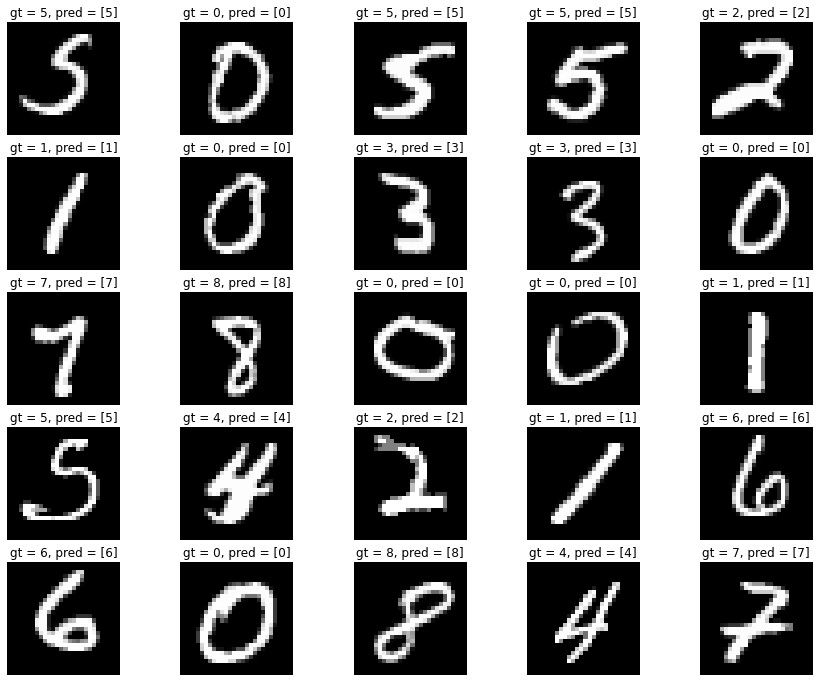

In [181]:
# Plot multiple
figure = plt.figure(figsize=(15, 12))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    output = model(img)
    pred_label = torch.max(output, 1)[1].numpy() # .numpy()将Tensor对象转换为NumPy ndarray对象
    figure.add_subplot(rows, cols, i)
    plt.title('gt = ' + str(label) + ', pred = ' + str(pred_label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 模型的保存与读取

In [180]:
# Save Model
torch.save(model.state_dict(), './Notes_NN/Notes224FNN.pth')

# Load Model
model = Net()  # 这是你的自定义模型类
model.load_state_dict(torch.load('./Notes_NN/Notes224FNN.pth'))

<All keys matched successfully>

## 卷积神经网络 Convolutional Neural Networks
### 卷积神经网络的定义 Definition
卷积神经网络是一种特殊的前馈神经网络 -- 首次由 Yann LeCun 在 [这篇文章](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf) 中介绍，它在网络处理过程中考虑了其输入（图像）的结构。在图像处理中，传统前馈神经网络往往会面临参数爆炸的问题，而卷积神经网络的出现很好的解决了这个问题。相较于传统FNN，CNN有以下的优点：
- **能处理高维度的输入** 例如，给定一个 $200 \times 200 \times 3$ 的RGB图像，输入层与第一个隐藏层之间的权重矩阵的维度为 $h_1$，则其大小为 $120000 \times h_1$。因此，不仅参数数量会爆炸，而且计算过程也会耗时长久。
- **能利用输入的拓扑结构** 如 $2D$ 或 $3D$ 图像。与其拥有一个大的权重矩阵，不如拥有寻找某些模式的小矩阵更好。
- **能构建对某些变化的不变性** 在图像分类任务中，对输入进行微小变换后，输出应保持不变。

卷积神经网络的基本结构大致分为三部分：**卷积层 Convolutional Layer (CONV)**，**池化层 Pooling Layer (POOL)**，**全连接层 Fully-Connected Layer (FC)**:
- **卷积层 Convolutional Layer**：用于从局部初步提取图片特征，包含以下几步
 - **Zero-Padding**: 目的是解决图像边缘特征的提取问题，即将原始图像像素矩阵的边缘各扩充一行/列，扩充部分的像素值均设置为 **0** 。
 - **卷积/特征过滤**: 选取若干 **卷积核 kernel / 特征过滤器 filter** （通常为水平，垂直两大特征），在扩充后的像素矩阵上依照指定 **步长 stride** 平移卷积核进行点积运算已提取特征。When the stride is 1 then we move the filters one pixel at a time. When the stride is 2 (or uncommonly 3 or more, though this is rare in practice) then the filters jump 2 pixels at a time as we slide them around. This will produce smaller output volumes spatially. 经由卷积操作后输出的图像称为一张 **特征图 Feature Map**, 每层卷积网络输入/输出的特征图个数称为 **通道 channel（类似于 RGB channel，比如彩色图在第一层卷积层的输入为 RGB 三个 channel，灰度图输入为一个 channel）**。
 - **RELU layer**: Apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the tensor unchanged.
 
<table>
    <tr>
        <td>
          <img src=".\Notes_NN\CONV_padding.png" width="400" />
        </td>
        <td>
        </td>
        <td>
          <img src=".\Notes_NN\CONV_kernel.png" width="1000" /> 
        </td>
    </tr>
</table>


- **池化层 Pooling Layer**: 用于进一步压缩图片信息，包含以下几步
 - **划分特征矩阵**：用相同大小的 **模式 pattern** 划分由卷积层输出的特征矩阵。
 - **向下采样 Down sampling/pooling**：从划分出来的网格中依次采样出最能代表该部分的值置于一个新的矩阵/容器 volume 中，最常见的方法是**取其中的最大值**，称为**最大池化**。
 - **扁平化层 Flatten Layer**：将同张图片目前所得的所有信息 **按序叠加 stack** 成一个一维tensor作为后续FC的输入。

<table>
    <tr>
        <td>
          <img src=".\Notes_NN\Pooling1.png" width="400" />
        </td>
        <td>
        </td>
        <td>
          <img src=".\Notes_NN\Pooling2.png" width="1000" /> 
        </td>
        <td>
          <img src=".\Notes_NN\Pooling3.png" width="400" /> 
        </td>
    </tr>
</table>

<p align="center">
<img src=".\Notes_NN\conv_pool_illust.png" width="400" title="Fully Convolutional Neural Network Example." >
</p>

- **全连接层 Fully-Connected Layer**: 用于正式分类 compute the class scores, where each of the numbers correspond to a class score/probability. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

<p align="center">
<img src=".\Notes_NN\CNN_full.png" width="1000" title="Fully Convolutional Neural Network Example." >
</p>


以上便是一个最简单的CNN。可以看出CNN的前半部分基本是一个 **压缩图片信息 + 降维** 的过程，实践中可以在 **扁平化之前插入多个卷积层/池化层** 以实现更复杂的图片识别、分类。或者用另一个卷积层代替 **FC** 形成 **全卷积网络（即网络中没有全连接操作）**，如下右图所示，此类网络一般用于图像处理，输出的结果为一张处理过后的图像，在后半层卷积网络中常包含有与pooling相逆的向上采样 **up-sampling/pooling** 或反卷积 **up-convolution** 操作用于还原之前损失的信息。强烈建议读者前往[这个CNN EXPLAINER](https://poloclub.github.io/cnn-explainer/)进行简单的实操理解。CNN的<span style="color: red;">**训练目标是得到卷积核的权重以及FC的参数**</span>。

<table>
    <tr>
        <td>
          <img src=".\Notes_NN\CNN2.jpg" width="500" />
        </td>
        <td>
        </td>
        <td>
          <img src=".\Notes_NN\fcn.png" width="500" /> 
    </tr>
</table>

相关资料
- [Stanford's CS231n CNN Tutorial](https://cs231n.github.io/convolutional-networks/)
- [【数之道 08】走进"卷积神经网络"](https://www.bilibili.com/video/BV1R5411w715/?spm_id_from=333.337.search-card.all.click&vd_source=ff901644057cda4596a72384c16c4fb4)

### 卷积神经网络的Python构建

In [225]:
# 数据准备用包
import torch
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader

# 搭建、训练网络用包
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# 数据准备
train_data = datasets.MNIST(
    root = 'data', 
    train = True,                    
    transform = T.ToTensor(), 
    download = True) 

In [162]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Input to conv1 will be image of shape [batch_size,1,28,28] 
        # (1 for one channel, height and width are 28 for this example)
        
        self.conv1 = nn.Sequential(   
            nn.Conv2d(in_channels=1,out_channels=10,kernel_size=(3,3),padding=1), # output of this conv is of shape [BS,10,28,28]
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) # output of this is [BS,10,14,14] BS stands for batch_size
        )
    
        self.conv2 = nn.Sequential( 
            nn.Conv2d(in_channels=10,out_channels=20,kernel_size=(3,3),padding=1), # output of this is [BS,20,14,14]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) # output of this is [BS,20,7,7]
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=30,kernel_size=(3,3),padding=1), # Output of this [BS,30,7,7]
            nn.ReLU(),
            nn.Conv2d(in_channels=30,out_channels=30,kernel_size=(3,3),padding=1), # Output of this [BS,30,7,7]
            nn.ReLU()
        )
        
        # Deconvolution & Unpooling, sometimes not necessary
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=30,out_channels=20,kernel_size=(3,3),padding=1), # Output of this [BS,20,7,7]
            nn.ReLU(),
            nn.Upsample(scale_factor=2))                                           # Output of this [BS,20,7*2,7*2]
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=10,kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2)) #[BS,10,28,28]
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=1,kernel_size=(1,1)),
            nn.Sigmoid()
        )
            

    def forward(self, x,plot=False):

        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        
        if plot:
            print('Input shape', x.shape)
            print('After layer 1', x1.shape)
            print('After layer 2', x2.shape)
            print('After layer 3', x3.shape)
            print('After layer 4', x4.shape)
            print('After layer 5', x5.shape)
            print('After layer 6', x6.shape)

        return x6

- <span style="color: red;">**nn.Sequential()**</span> 是PyTorch中的一个容器模块，用于便捷地组合其他模块（例如nn.Conv2d, nn.ReLU等）。当nn.Sequential实例作为一个网络并传入一个输入时，它会将输入依次传递给它所包含的各个模块，并将一个模块的输出作为下一个模块的输入。


- **Pytorch** requires inputs to a convolutional layer to be of shape <span style="color: red;">**(BatchSize,Channels,Height,Width)**</span>. When using **dataloaders** this is done **automatically**, and so during your training loop you won't need to worry about this. However, if defining your own function may error as img is of shape (Channels,Height,Width), and not (1,Channels,Height,Width) -- (as you are essentially passing a batch of 1 when predicting a single image.  
 - **<span style="color: red;">tensor.unsqueeze(dim)</span>** 方法用来在位置 dim 为张量增加一个新维度，新的维度的大小为1。
 - **<span style="color: red;">tensor.squeeze(dim)</span>**  方法用来消除在位置 dim 的大小为1的维度。特别地，tensor.squeeze() 默认消除所有大小为1的维度。


- A similar problem here is when plotting the image. **matplotlib** expects your image to be of shape **(Height,Width,Channels) (i.e. the channels to be the final dim)**. To transpose an image from shape (Channels,Height,Width) to (Height,Width,Channels), use
 - **<span style="color: red;">img = np.transpose(img,[1,2,0])，其中[1,2,0]为要交换的轴下标。</span>** 
 - **<span style="color: red;">img = img.permute(1, 2, 0)，其中[1,2,0]为要交换的轴下标。</span>**

In [163]:
# Look at layers
model = CNN()
print(model, end='\n\n')

image, label = train_data[0] # [1,28,28] 
image = image.unsqueeze(1)   # [1,1,28,28] unsqueeze()方法用来在位置 1 为张量增加一个新维度。这个方法会在指定位置插入一个新的维度，新的维度的大小（size）为1。
print(image.shape, end='\n\n')

output = model(image, plot=True)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(30, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Upsample(scale_factor=2.0, mode='nearest')
  )
  (conv5): Sequential(
    (0): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Upsample(scale_factor=2.0, mode='nearest')
  )
  (conv6): Sequential(


# 图像处理 Image Processing
## U-Net
### 反卷积 Deconvolution
下文代码中将使用的 **nn.ConvTranspose2d** 是 PyTorch 中的一个模块，用于实现**二维**的转置卷积操作，也被称为**反卷积，去卷积去卷积（Deconvolution）或者上采样**操作。该操作可以将输入的特征图尺寸放大，通常被用在图像生成或者语义分割等任务中，帮助模型从小尺寸的特征图恢复到原始的大尺寸。它是一种特殊的正向卷积，先按照一定的比例通过补0来扩大输入图像的尺寸，接着旋转卷积核(Kernel)，再进行正向卷积。 反卷积的操作只是恢复了矩阵的尺寸大小，并不能恢复每个元素值。需要注意的是，虽然转置卷积操作可以增大特征图的尺寸，但它并**不是卷积操作的逆操作。**

此外，<span style="color: red;">**nn.ConvTranspose2d 中的参数也与之前的 nn.Conv2d**</span>[ 略有不同：](https://blog.51cto.com/u_11466419/5459142)
- 在传统卷积中，我们的 **padding** ($p$) 范围为 0 ~ k-1 (k为卷积核的大小)，$p=0$ 时被称为 No padding
- 在反卷积中刚好相反，**padding** ($p'=k-1-p$)。也就是当我们传 $p'=0$ 时，相当于在传统卷积中传了 $p=k-1$

我们可以使用常见卷积实现转置卷积。这里我们用一个简单的例子来说明，输入层为$2 \times 2$，先进行padding为 $p=2\ (p'=0)$ 的零填充，再使用步长Stride为1的$3 \times 3$卷积核进行卷积操作则实现了上采样，上采样输出的大小为$4 \times 4$。原链接：https://www.zhihu.com/question/48279880/answer/1682194600
<p align="center">
<img src=".\Notes_IMProcess\deconv_padding.webp" width="300" title="Image." >
</p>



- 在传统卷积中，我们的 **stride** ($s$) 表示卷积核移动的步长
- 在反卷积中，**stride** ($s'$) 表示表示往输入图片每两个像素点中间填充0，而填充的数量就是 $s' - 1$，核的移动步长 ($s$) 默认为1

下面是两个不同 stride 下的反卷积操作，分别为$s'=1,\ s'=2$

<table>
    <tr>
        <td>
          <img src=".\Notes_IMProcess\deconv_s1.gif" width="250" />
        </td>
        <td>
        </td>
        <td>
          <img src=".\Notes_IMProcess\deconv_s2.gif" width="250" /> 
    </tr>
</table>

综上，对于 nn.ConvTranspose2d 输出的高度（H_out），同宽度（W_out），可以用以下公式进行计算：

$$H_{out} = (H_{in} - 1) \times s' - 2p' + dilation\times(k - 1) + output padding + 1$$

上述的其他参数的含义详见[此处可视化](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)，默认 dilation 与 output padding 取 1 & 0，即默认：

$$H_{out} = (H_{in} - 1)\times s' - 2p' + k $$


### U-Net的构造
U-Net是比较早的使用 **全卷积** 网络进行语义分割的算法之一，论文中使用包含 **压缩路径** 和 **扩展路径** 的对称U形结构在当时非常具有创新性，且一定程度上影响了后面若干个分割网络的设计，该网络的名字也是取自其U形形状。

U-Net的实验是一个比较简单的ISBI cell tracking数据集，由于本身的任务比较简单，U-Net紧紧通过30张图片并辅以数据扩充策略便达到非常低的错误率，拿了当届比赛的冠军。论文源码已开源，可惜是基于MATLAB的Caffe版本。虽然已有各种开源工具的实现版本的U-Net算法陆续开源，但是它们绝大多数都刻意回避了U-Net论文中的细节，虽然这些细节现在看起来已无关紧要甚至已被淘汰，但是为了充分理解这个算法，笔者还是建议去阅读作者的源码，地址如下：https://lmb.informatik.uni-freiburg.de

U-Net的U形结构如下图所示。网络是一个经典的全卷积网络（即网络中没有全连接操作）。网络的输入是一张 $572 \times 572$ 的 **边缘经过镜像操作的单通道（ channel = 1 ）图片（input image tile）**，关于"镜像操作"会在后文进行详细分析，网络的左侧（红色框）是由 **卷积**，**归一化** 和 **Max Pooling** 构成的一系列降采样操作，论文中将这一部分叫做 **压缩路径（contracting path）**。压缩路径由4个block组成，每个block使用了3个有效卷积和1个 Max Pooling 降采样，每次**降采样之后 Feature Map 的大小除以2**，因此有了图中所示的 Feature Map 尺寸变化。最终得到了尺寸为的 $32 \times 32$ Feature Map。同时，在每个block的**第一层卷积后channel数乘2**。

网络的右侧部分（绿色框）在论文中叫做**扩展路径（expansive path）**。同样由4个block组成，每个block开始之前通过**反卷积将 Feature Map 的尺寸乘2，同时将其通道数减半（最后一层略有不同），和左侧对称的压缩路径的 Feature Map 合并**，由于左侧压缩路径和右侧扩展路径的 Feature Map 的尺寸不一样，U-Net是通过**将压缩路径的 Feature Map 裁剪到和扩展路径相同尺寸的 Feature Map 进行归一化的（即图1中左侧虚线部分）**。扩展路径的卷积操作依旧使用的是有效卷积操作。由于该任务是一个二分类任务，所以网络有两个输出 Feature Map。
 
<p align="center">
<img src=".\Notes_IMProcess\unet.png" width="800" title="Image." >
</p>

**为什么要归一化？**
- 归一化操作针对同一批次内所有位于同一通道的像素点进行（即计算均值方差时会考虑该批次内的所有图片），能够在网络训练过程中，提高网络的训练稳定性和学习速度
- 引入两个可学习的参数，即缩放参数（gamma）和平移参数（beta）。这两个参数的形状与输入通道数相同。通过训练，网络能够学习到最优的gamma和beta，使得模型的表现最好
- 采用函数 **nn.BatchNorm2d(num_features, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)** 对有C个通道的，维度为(H,W)的二维数据进行批量归一化
 - 调用时输入参数为一个维度为 **(N,C,H,W)** 的tensor，分别代表 **(batch_size, channel_number, height, width)**
 - **num_features (int)** – C，channel_number
 - [document](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)
 
 补充材料
 - [知乎](https://zhuanlan.zhihu.com/p/43927696)
 - [原Paper](https://arxiv.org/pdf/1505.04597.pdf)

In [ ]:
# 数据准备用包
import torch
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader

# 搭建、训练网络用包
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [202]:
# 蓝色箭头 - two steps conv
class conv_block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        # 添加 padding 确保 crop 时维数一致，原论文中无 padding
        super().__init__()
        self.activation_fn = nn.ReLU()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels,  kernel_size=kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
            self.activation_fn,
            
            nn.Conv2d(out_channels, out_channels,  kernel_size=kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
            self.activation_fn 
        )
    
    def forward(self, x):
        x = self.conv(x)
        return x

# Contracting Path - conv, conv, pool
class down_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = conv_block(in_channels, out_channels)
        self.pool = nn.MaxPool2d((2,2))

    def forward(self, inputs):
        x = self.conv(inputs)
        p = self.pool(x)
        return x,p      # 注意由于在反卷积时会拼接先前的 Feature map，固要返回 x

# Expanding Path - up, conv, conv
class up_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2, padding=0) ## See 3.1.1
        self.conv = conv_block(out_channels+out_channels, out_channels)
    
    def forward(self, inputs, skip):
        x = self.up(inputs)
        x = torch.cat([x, skip], axis=1) # copy & crop
        x = self.conv(x)
        return x

# Construct the whole U-Net
class UNet(nn.Module):

    def __init__(self, in_channels=3, out_channels = 1, f = [64,128,256,512,1024]):
        super().__init__()

        self.encoder1 = down_block(in_channels, f[0])
        self.encoder2 = down_block(f[0],f[1])
        self.encoder3 = down_block(f[1],f[2])
        self.encoder4 = down_block(f[2],f[3])

        self.bottleneck = conv_block(f[3],f[4])

        self.decoder1 = up_block(f[4],f[3])
        self.decoder2 = up_block(f[3],f[2])
        self.decoder3 = up_block(f[2],f[1])
        self.decoder4 = up_block(f[1],f[0])

        self.outputs = nn.Conv2d(f[0], out_channels, kernel_size = 1, padding = 0)
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self, inputs):
        c1, p1 = self.encoder1(inputs)
        c2, p2 = self.encoder2(p1)
        c3, p3 = self.encoder3(p2)
        c4, p4 = self.encoder4(p3)

        bn = self.bottleneck(p4)

        d1 = self.decoder1(bn, c4)
        d2 = self.decoder2(d1, c3)
        d3 = self.decoder3(d2, c2)
        d4 = self.decoder4(d3, c1)

        outputs = self.outputs(d4)
        outputs = self.sigmoid_layer(outputs)
        
        plot = True
        if plot:
            print('Input shape', inputs.shape)
            print('After layer 1', p1.shape)
            print('After layer 2', p2.shape)
            print('After layer 3', p3.shape)
            print('After layer 4', p4.shape)
            print('After bn', bn.shape)
            print('After layer 6', d1.shape)
            print('After layer 7', d2.shape)
            print('After layer 8', d3.shape)
            print('After layer 9', d4.shape)
            print('Output shape', outputs.shape)

        return outputs
    
model = UNet()
x = torch.zeros([1,3,256,256])
y = model(x)

Input shape torch.Size([1, 512, 32, 32])
Input shape torch.Size([1, 1024, 16, 16])
Input shape torch.Size([1, 3, 256, 256])
After layer 1 torch.Size([1, 64, 128, 128])
After layer 2 torch.Size([1, 128, 64, 64])
After layer 3 torch.Size([1, 256, 32, 32])
After layer 4 torch.Size([1, 512, 16, 16])
After bn torch.Size([1, 1024, 16, 16])
After layer 6 torch.Size([1, 512, 32, 32])
After layer 7 torch.Size([1, 256, 64, 64])
After layer 8 torch.Size([1, 128, 128, 128])
After layer 9 torch.Size([1, 64, 256, 256])
Output shape torch.Size([1, 1, 256, 256])


上述网络若改成输入 572\*572 图片会报错，为什么？因为在进行第三次 maxpooling 后，图片被压缩成 71\*71 (70.5四舍五入)，第四次 maxpooling 后，图片被压缩成 35\*35 (35.5四舍五入)，解码后第一次 deconvolution 将维度乘2变为 70\*70 与 71\*71 不一致

## 图像处理实例 - 语义分割 Semantic Segmentation
语义分割（Semantic Segmentation）是计算机视觉中的一个重要任务，其目标是理解图像在像素级别上的内容。这意味着该任务不仅要求模型识别图像中的物体，还要求模型能够准确地划分出每个物体的边界，即对图像中的每个像素进行分类。

在语义分割任务中，我们的目标是将图像划分为多个部分或区域，并对每个部分赋予相应的标签或类别。例如，在自动驾驶的应用中，我们可能需要对道路、人行道、行人、车辆、建筑物等不同类型的物体进行像素级别的识别和分割。

语义分割的主要挑战在于如何准确地划分物体的边界，以及如何处理类别间的不均衡（某些类别在图像中出现的频率远高于其他类别）。

- Image segmentation is the task of partitioning an image, or identifying an object in an image
- Particular value in medical imaging, highlighting objects of interest
- The target image is a binary image, where pixels = 0 are background and pixels = 1 are foreground. We want the network to output a binary image replicating this.

<table>
    <tr>
        <td>
          <img src="./Notes_IMProcess/DRIVE/training/images/21_training.png" width="200" />
        </td>
        <td>
        </td>
        <td>
          <img src="./Notes_IMProcess/DRIVE/training/1st_manual/21_manual1.png" width="200" /> 
    </tr>
</table>

In [14]:
# 数据准备用包
import torch
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader

# 搭建、训练网络用包
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# 其他数据处理包
from skimage import io, transform
from PIL import Image

### 读入数据 - 构建自己的 Data Loader

In [17]:
def get_paths(base_path='./Notes_IMProcess/DRIVE/'):
    # 这个函数用于读入训练与测试图片的位置
    train_im_paths = []
    train_gt_paths = []
    test_im_paths = []
    test_gt_paths = []
    
    for i in range(21, 41):
        train_im_paths.append(base_path + 'training/images/%d_training.tif'%(i))
        train_gt_paths.append(base_path + 'training/1st_manual/%d_manual1.gif'%(i))

    for i in range(1, 21):
        test_im_paths.append(base_path + 'test/images/%d_test.png'%(i))
        test_gt_paths.append(base_path + 'test/1st_manual/%d_manual1.gif'%(i))
        
    train_paths = [train_im_paths, train_gt_paths]
    test_paths = [test_im_paths, test_gt_paths]
    return train_paths, test_paths

def read_and_resize(im_paths, gt_paths, resize=(256, 256, 1)): 
    # 这个函数用于将读入图片预处理，边缘填充
    imgs = io.imread(im_paths, 1) ## See remark below
    gts = io.imread(gt_paths, 1) 

    imgs = transform.resize(imgs, resize) ## See remark below
    gts = transform.resize(gts, resize) 
        
    return imgs, gts

skimage 库是一个属于 Python 的图像处理库
- **io.imread(im_paths, as_gray=False)**：用于读取图像文件。它将图像作为size为 <span style="color: red;">**(height, width, channels)**</span> 的多维NumPy数组返回。特别地，io.imread(im_paths, 1) 等价于 as_gray=True


- **transform.resize(image, output_shape, mode='reflect')**：
 - **image**：输入的ndarray图像，size 为 (height, width, channels)；
 - **output_shape**：是一个元组，定义了调整后的图像尺寸。它应与 image 的维数相同，但可以改变每个维度的大小；
 - **mode**：是用于填充超出原始图像边界的数据的模式。默认值是 **'reflect'**，正是 <span style="color: red;">Unet 所用的填充方式。</span>

In [18]:
from PIL import Image
import torchvision.transforms as T

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, paths):
        # Initialize file paths or a list of file names. 
        self.im_paths = paths[0]
        self.gt_paths = paths[1]
        self.preprocesses = T.Compose([T.Resize((256,256)), T.ToTensor()])
    
    def __getitem__(self, index):
        # Read and Preprocess one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        ## This magic method is necessary, return a tuple of (image, label)
        image = self.preprocesses( Image.open(self.im_paths[index]) )
        label = self.preprocesses( Image.open(self.gt_paths[index]) )
        
        # Ensure gt is binary (PyTorch像素亮度范围为0-1)
        label[label>.5]  = 1
        label[label<=.5] = 0
        
        return image, label
        
    def __len__(self):
         ## This magic method is necessary
        return len(self.im_paths)

In [19]:
# 数据准备
train_paths, test_paths = get_paths()
train_data = CustomDataset(train_paths)
test_data  = CustomDataset(test_paths)

# 构造loaders
loaders = {
    'train' : torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=4, 
                                           shuffle=True),
    
    'test'  : torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=4, 
                                           shuffle=True) }

上述代码有以下几个只是带你需要单独说明：
- **torchvision.transforms 包**
 - **T.Resize((256,256))**：将读入的PIL图像或者numpy数组大小调整到 256x256，操作仅改变图像的高度和宽度，不改变通道数；
 - **T.ToTensor()**：将读入的PIL图像或者numpy数组转换为 PyTorch 的张量变量，并且自动把像素值的范围从[0, 255]缩放到[0.0, 1.0]，把size 从 (Height, Width, Channel) 更改为 (Channel, Height, Width)；
 - **T.Compose([T.func1, ... , T.funcn])**: 可以接收一个图像预处理函数的列表作为输入，并按照这个列表中的顺序将这些函数应用到输入图像上；
 
 
 
- **魔术方法**
 - 魔术方法（也被称为特殊方法）是Python中的一种内置方法，它们在特定的情况下自动调用。当你创建自己的对象时，你可以定义一些与这些特殊方法同名的方法来改变一些默认行为。例如，__init__ 方法会在对象创建后自动调用，我们通常用它来进行一些初始化操作。这些方法提供了一种非常方便的方式来定制你的对象的行为。它们并不是必须的，但如果你的对象需要特定的行为，你可以实现这些方法。注意，不要在这些特殊方法之外使用**双下划线**，因为 Python 使用它们来实现特殊的行为。
 - **\__getitem__**：当我们使用索引 instance[index] 访问对象时，会自动调用这方法；
 - **\__len__**：当我们使用内置函数 len(instance) 获取一个对象的长度时，会自动调用该方法。它应该返回一个整数，表示对象的长度。
 
 
 
 - **torch.utils.data.DataLoader 的 input dataset**
  - PyTorch 的 DataLoader 的输入主要是一个实现了 torch.utils.data.Dataset 接口的对象。这个对象应该定义了__getitem__和__len__方法。
  - **\__getitem__** 方法应返回一个数据样本，这可能是一个元组，包含一个数据点和它的标签，或者只是一个数据点 (unsupervised learning)。
  - **\__len__** 方法应返回数据集中的样本总数。

In [5]:
# 检查维度
for images , labels in loaders['train']:
    print(images.size())
    print(labels.size(), end='\n\n')

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])



### 构建神经网络

In [23]:
# This is a common CNN
class CNN(nn.Module):
    def __init__(self, img_size, in_channels=3, out_channels=1):
        super().__init__()
        
        f = [ 10, 20, 30, 20, 10, out_channels ]
        
        self.conv1 = nn.Sequential(   
            nn.Conv2d(in_channels=in_channels, out_channels=f[0], kernel_size=(3,3), padding=1), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) 
        )
        self.conv2 = nn.Sequential( 
            nn.Conv2d(in_channels=f[0], out_channels=f[1], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) 
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=f[1], out_channels=f[2], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=f[2], out_channels=f[2], kernel_size=(3,3), padding=1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=f[2], out_channels=f[3], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=f[3], out_channels=f[4], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=f[4], out_channels=f[5], kernel_size=(1,1)),
            nn.Sigmoid()
        )
            

    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        
        return x

In [24]:
# This is a U-Net
# Two steps conv
class conv_block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        # 添加 padding 确保 crop 时维数一致，原论文中无 padding
        super().__init__()
        self.activation_fn = nn.ReLU()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels,  kernel_size=kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
            self.activation_fn,
            
            nn.Conv2d(out_channels, out_channels,  kernel_size=kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
            self.activation_fn 
        )
    
    def forward(self, x):
        x = self.conv(x)
        return x

# Contracting Path - conv, conv, pool
class down_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = conv_block(in_channels, out_channels)
        self.pool = nn.MaxPool2d((2,2))

    def forward(self, inputs):
        x = self.conv(inputs)
        p = self.pool(x)
        return x,p      # 注意由于在反卷积时会拼接先前的 Feature map，固要返回 x

# Expanding Path - up, conv, conv
class up_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2, padding=0) ## See 3.1.1
        self.conv = conv_block(out_channels+out_channels, out_channels)
    
    def forward(self, inputs, skip):
        x = self.up(inputs)
        x = torch.cat([x, skip], axis=1) # copy & crop
        x = self.conv(x)
        return x

# Construct the whole U-Net
class UNet(nn.Module):

    def __init__(self, img_size, in_channels=3, out_channels=1, f=[64,128,256,512,1024]):
        super().__init__()

        self.encoder1 = down_block(in_channels, f[0])
        self.encoder2 = down_block(f[0],f[1])
        self.encoder3 = down_block(f[1],f[2])
        self.encoder4 = down_block(f[2],f[3])

        self.bottleneck = conv_block(f[3],f[4])

        self.decoder1 = up_block(f[4],f[3])
        self.decoder2 = up_block(f[3],f[2])
        self.decoder3 = up_block(f[2],f[1])
        self.decoder4 = up_block(f[1],f[0])

        self.outputs = nn.Conv2d(f[0], out_channels, kernel_size = 1, padding = 0)
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self, inputs):
        c1, p1 = self.encoder1(inputs)
        c2, p2 = self.encoder2(p1)
        c3, p3 = self.encoder3(p2)
        c4, p4 = self.encoder4(p3)

        bn = self.bottleneck(p4)

        d1 = self.decoder1(bn, c4)
        d2 = self.decoder2(d1, c3)
        d3 = self.decoder3(d2, c2)
        d4 = self.decoder4(d3, c1)

        outputs = self.outputs(d4)
        outputs = self.sigmoid_layer(outputs)
        
        return outputs

In [245]:
# CNN_model = CNN(img_size=256, in_channels=3, out_channels=1)
# Unet_model = UNet(img_size=256, in_channels=3, out_channels=1)

### 训练网络

In [25]:
# 训练函数
def train(model, loaders, num_epochs=100, learning_rate=0.001):
    
    ## 将模型设置为训练模式
    model.train() 
        
    # Optimizer & Loss function
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)   # 采用Adam优化器
    loss_func = nn.BCELoss() ##
    
    for epoch in range(num_epochs):
        for i, (features, labels) in enumerate(loaders['train']):  
            
            ## Forward calculation for the loss function 
            output = model(features)        
            loss = loss_func(output, labels)
 
            ## Backpropagation, update parameters
            optimizer.zero_grad()           
            loss.backward()                 
            optimizer.step()                
            
            # Display the training progress
            if (i+1) % 2 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, len(loaders['train']), loss.item()))   

In [39]:
# CNN
CNN_model = CNN(img_size=256, in_channels=3, out_channels=1)
train(CNN_model, loaders, num_epochs=200, learning_rate=0.001)

Epoch [1/200], Step [2/5], Loss: 0.6845
Epoch [1/200], Step [4/5], Loss: 0.6726
Epoch [2/200], Step [2/5], Loss: 0.6382
Epoch [2/200], Step [4/5], Loss: 0.5863
Epoch [3/200], Step [2/5], Loss: 0.4663
Epoch [3/200], Step [4/5], Loss: 0.3649
Epoch [4/200], Step [2/5], Loss: 0.3636
Epoch [4/200], Step [4/5], Loss: 0.3866
Epoch [5/200], Step [2/5], Loss: 0.3615
Epoch [5/200], Step [4/5], Loss: 0.3074
Epoch [6/200], Step [2/5], Loss: 0.3277
Epoch [6/200], Step [4/5], Loss: 0.3121
Epoch [7/200], Step [2/5], Loss: 0.2730
Epoch [7/200], Step [4/5], Loss: 0.3224
Epoch [8/200], Step [2/5], Loss: 0.2750
Epoch [8/200], Step [4/5], Loss: 0.2584
Epoch [9/200], Step [2/5], Loss: 0.2709
Epoch [9/200], Step [4/5], Loss: 0.2706
Epoch [10/200], Step [2/5], Loss: 0.2626
Epoch [10/200], Step [4/5], Loss: 0.2683
Epoch [11/200], Step [2/5], Loss: 0.2574
Epoch [11/200], Step [4/5], Loss: 0.2517
Epoch [12/200], Step [2/5], Loss: 0.2782
Epoch [12/200], Step [4/5], Loss: 0.2525
Epoch [13/200], Step [2/5], Loss: 

Epoch [101/200], Step [4/5], Loss: 0.2284
Epoch [102/200], Step [2/5], Loss: 0.2319
Epoch [102/200], Step [4/5], Loss: 0.2270
Epoch [103/200], Step [2/5], Loss: 0.2236
Epoch [103/200], Step [4/5], Loss: 0.2299
Epoch [104/200], Step [2/5], Loss: 0.2136
Epoch [104/200], Step [4/5], Loss: 0.2331
Epoch [105/200], Step [2/5], Loss: 0.2482
Epoch [105/200], Step [4/5], Loss: 0.2193
Epoch [106/200], Step [2/5], Loss: 0.2535
Epoch [106/200], Step [4/5], Loss: 0.2270
Epoch [107/200], Step [2/5], Loss: 0.2359
Epoch [107/200], Step [4/5], Loss: 0.2400
Epoch [108/200], Step [2/5], Loss: 0.2432
Epoch [108/200], Step [4/5], Loss: 0.2204
Epoch [109/200], Step [2/5], Loss: 0.2323
Epoch [109/200], Step [4/5], Loss: 0.2393
Epoch [110/200], Step [2/5], Loss: 0.2249
Epoch [110/200], Step [4/5], Loss: 0.2301
Epoch [111/200], Step [2/5], Loss: 0.2391
Epoch [111/200], Step [4/5], Loss: 0.2385
Epoch [112/200], Step [2/5], Loss: 0.2304
Epoch [112/200], Step [4/5], Loss: 0.2358
Epoch [113/200], Step [2/5], Loss:

Epoch [199/200], Step [4/5], Loss: 0.1673
Epoch [200/200], Step [2/5], Loss: 0.1864
Epoch [200/200], Step [4/5], Loss: 0.1909


In [249]:
# U-Net
Unet_model = UNet(img_size=256, in_channels=3, out_channels=1)
train(Unet_model, loaders, num_epochs=100, learning_rate=0.001)

Epoch [1/100], Step [2/5], Loss: 0.6012
Epoch [1/100], Step [4/5], Loss: 0.4589
Epoch [2/100], Step [2/5], Loss: 0.3965
Epoch [2/100], Step [4/5], Loss: 0.3630
Epoch [3/100], Step [2/5], Loss: 0.3390
Epoch [3/100], Step [4/5], Loss: 0.3357
Epoch [4/100], Step [2/5], Loss: 0.3058
Epoch [4/100], Step [4/5], Loss: 0.3020
Epoch [5/100], Step [2/5], Loss: 0.2760
Epoch [5/100], Step [4/5], Loss: 0.2705
Epoch [6/100], Step [2/5], Loss: 0.2519
Epoch [6/100], Step [4/5], Loss: 0.2414
Epoch [7/100], Step [2/5], Loss: 0.2384
Epoch [7/100], Step [4/5], Loss: 0.2226
Epoch [8/100], Step [2/5], Loss: 0.2109
Epoch [8/100], Step [4/5], Loss: 0.2040
Epoch [9/100], Step [2/5], Loss: 0.2135
Epoch [9/100], Step [4/5], Loss: 0.1993
Epoch [10/100], Step [2/5], Loss: 0.1953
Epoch [10/100], Step [4/5], Loss: 0.2009
Epoch [11/100], Step [2/5], Loss: 0.1869
Epoch [11/100], Step [4/5], Loss: 0.1771
Epoch [12/100], Step [2/5], Loss: 0.1648
Epoch [12/100], Step [4/5], Loss: 0.1722
Epoch [13/100], Step [2/5], Loss: 

In [40]:
# Save Model
# torch.save(Unet_model.state_dict(), './Notes_IMProcess/Notes323UNET.pth')
# torch.save(CNN_model.state_dict(), './Notes_IMProcess/Notes323CNN.pth')

### 可视化

In [41]:
# Load Model
CNN_model = CNN(img_size=256, in_channels=3, out_channels=1)  
Unet_model = UNet(img_size=256, in_channels=3, out_channels=1)

CNN_model.load_state_dict(torch.load('./Notes_IMProcess/Notes323CNN.pth'))
Unet_model.load_state_dict(torch.load('./Notes_IMProcess/Notes323UNET.pth'))

<All keys matched successfully>

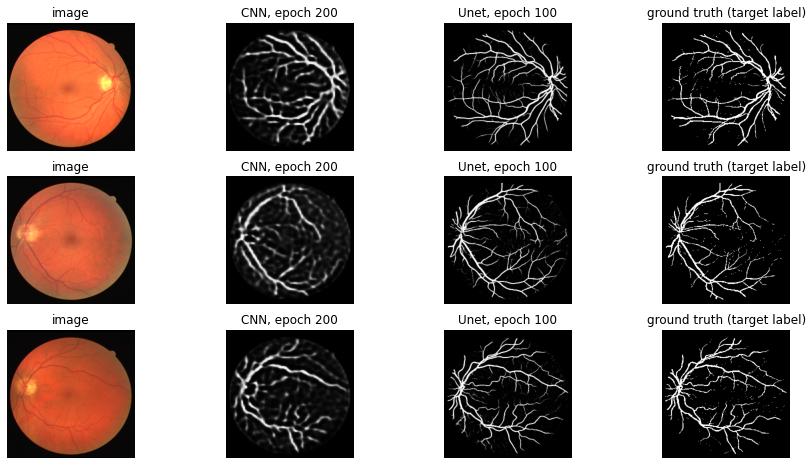

In [46]:
dataset = test_data
train_loader = loaders['test']

with torch.no_grad():
    figure = plt.figure(figsize=(15, 8))
    rows = 3
    for i in range(0, rows):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]

        CNN_output  = CNN_model(img.unsqueeze(0))
        Unet_output = Unet_model(img.unsqueeze(0))

        figure.add_subplot(rows, 4, 4*i + 1)
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title("image")
        
        figure.add_subplot(rows, 4, 4*i + 2)
        plt.axis("off")
        plt.imshow(CNN_output.squeeze(), cmap="gray")
        plt.title("CNN, epoch 200")
        
        figure.add_subplot(rows, 4, 4*i + 3)
        plt.axis("off")
        plt.imshow(Unet_output.squeeze(), cmap="gray")
        plt.title("Unet, epoch 100")
        
        figure.add_subplot(rows, 4, 4*i + 4)
        plt.axis("off")
        plt.imshow(torch.squeeze(label), cmap="gray")
        plt.title("ground truth (target label)")

## 图像处理实例 - 无监督学习的图像去噪 Image Denoising with Unsupervised Learning
### 生成含噪图像

In [ ]:
# 数据准备用包
import torch
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader

# 搭建、训练网络用包
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# 其他数据处理包
from skimage import io, transform
from PIL import Image

In [68]:
# 数据准备
train_data = datasets.MNIST(root = 'data', train = True, transform = T.ToTensor(), download = True)
test_data = datasets.MNIST(root = 'data', train = False, transform = T.ToTensor())

# 将手写图像加上模拟的噪声
sigma = 70/255.0 # noise level

train_targets = train_data.data.numpy() / 255.0
train_features = (train_targets + np.random.normal(0, sigma, train_targets.shape)).clip(0,1) # .clip(0,1) 用来确保图像的像素值在 0-1 的范围内

test_targets = test_data.data.numpy() / 255.0
test_features = (test_targets + np.random.normal(0, sigma, test_targets.shape)).clip(0,1) # .clip(0,1) 用来确保图像的像素值在 0-1 的范围内

loaders = { 'train' : torch.utils.data.DataLoader(train_features, batch_size=100, shuffle=True, num_workers=1),
            'test'  : torch.utils.data.DataLoader(test_features, batch_size=100, shuffle=True, num_workers=1) }

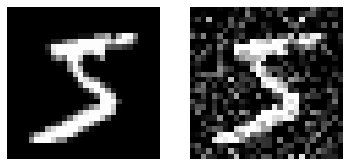

In [77]:
fig = plt.figure();
plt.subplot(1,2,1);
plt.axis("off");
plt.imshow(train_targets[0],cmap='gray');

plt.subplot(1,2,2);
plt.axis("off");
plt.imshow(train_features[0],cmap='gray');

### 无监督学习的去噪模型
- In our denoising setup we assume no label. Our dataset consists of only observed noisy images, i.e. $\mathcal{D} = \{ \mathbf{x}_i \in \mathbb{R}^{h \times w} \}_{i=1}^n$. This approach (not using labels) is known as **unsupervised learning**.

- We will implement a classic denoising model, whose loss function is composed of two terms:

$$ \mathcal{L}\ (\ \theta\ ) =   \textstyle \sum_{i=1}^{\ n} \left \{\  ||\  \nabla_{(x,y)}\ f(\mathbf{x}_i;\theta) \ || + \frac{\lambda}{2} ||\  f(\mathbf{x}_i; \theta) - \mathbf{x}_i \ ||^2\ \right \} $$

- where $\lambda>0$ is a parameter which we hand tune according to the strength of noise. If we have a large $\lambda$, the second term is more dominiant and our network output will be matched more closely to the input (i.e. $f(\mathbf{x}_i ; \theta) \approx \mathbf{x}_i$). If $\lambda$ is small, the first term will be more dominant and more smoothing will occur.


- 注意，一方面，$f$ 可以被视为关于输入图像的函数 $f(\mathbf{x}_i;\theta)$，另一方面也可以视为关于二维像素坐标 (x,y) 的函数 $f(x,y\ ;\ \mathbf{x}_i,\theta)$，所以损失函数中的梯度项是关于像素坐标的梯度而不是输入变量 $\mathbf{x}_i$ 的梯度.

In [97]:
# This is a self-defined Loss function
def up_shift(f):
    g = torch.zeros_like(f)
    g[:, :, :-1, :] = f[:, :, 1:, :] # input f is of size (batch_size, C, H, W)
    g[:, :, -1, : ] = f[:, :, -1, :]
    return g

def down_shift(f):
    g = torch.zeros_like(f)
    g[:, :, 1:, :] = f[:, :, :-1, :]
    g[:, :, 0, : ] = f[:, :, 0, :]
    return g

def left_shift(f):
    g = torch.zeros_like(f)
    g[:, :, :, :-1] = f[:, :, :, 1:]
    g[:, :, :, -1 ] = f[:, :, :, -1]
    return g

def right_shift(f):
    g = torch.zeros_like(f)
    g[:, :, :, 1:] = f[:, :, :, :-1]
    g[:, :, :, 0 ] = f[:, :, :, 0]
    return g

def grad(f):
    f_x = (left_shift(f) - right_shift(f))/2
    f_y = (down_shift(f) - up_shift(f))/2 
    return torch.sqrt(f_x**2 + f_y**2 + 1e-7) # + 1e-7 防止 f_x, f_y 过小

class denoising_loss(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, denoised, noisy, lambdaP):     
        TV_term = grad(denoised)
        Fit_Term = (lambdaP/2)*(denoised-noisy)**2
        loss = TV_term + Fit_Term
        return loss.mean()

In [98]:
# This is a common CNN
class CNN(nn.Module):
    def __init__(self, img_size, in_channels=3, out_channels=1):
        super().__init__()
        
        f = [ 10, 20, 30, 20, 10, out_channels ]
        
        self.conv1 = nn.Sequential(   
            nn.Conv2d(in_channels=in_channels, out_channels=f[0], kernel_size=(3,3), padding=1), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) 
        )
        self.conv2 = nn.Sequential( 
            nn.Conv2d(in_channels=f[0], out_channels=f[1], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) 
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=f[1], out_channels=f[2], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=f[2], out_channels=f[2], kernel_size=(3,3), padding=1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=f[2], out_channels=f[3], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=f[3], out_channels=f[4], kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=f[4], out_channels=f[5], kernel_size=(1,1)),
            nn.Sigmoid()
        )        

    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        
        return x

In [99]:
# 训练函数
def train(model, loaders, num_epochs=10, lambdaP=8, learning_rate=0.001):
    
    ## 将模型设置为训练模式
    model.train() 
        
    # Optimizer & Loss function
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)   
    loss_func = denoising_loss() ##
    
    for epoch in range(num_epochs):
        for i, features in enumerate(loaders['train']):  
            
            ## Forward calculation for the loss function
            features = features.unsqueeze(1).float()
            output = model(features)        
            loss = loss_func(output, features, lambdaP)
 
            ## Backpropagation, update parameters
            optimizer.zero_grad()           
            loss.backward()                 
            optimizer.step()                
            
            # Display the training progress
            if (i+1) % 2 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, len(loaders['train']), loss.item()))   

In [100]:
# Train Model
denoising_model = CNN(img_size=28, in_channels=1, out_channels=1)
train(denoising_model, loaders, num_epochs=10, lambdaP=10, learning_rate=0.001)

Epoch [1/10], Step [2/600], Loss: 1.0801
Epoch [1/10], Step [4/600], Loss: 1.0711
Epoch [1/10], Step [6/600], Loss: 1.0528
Epoch [1/10], Step [8/600], Loss: 1.0145
Epoch [1/10], Step [10/600], Loss: 0.9475
Epoch [1/10], Step [12/600], Loss: 0.8259
Epoch [1/10], Step [14/600], Loss: 0.7065
Epoch [1/10], Step [16/600], Loss: 0.6865
Epoch [1/10], Step [18/600], Loss: 0.7111
Epoch [1/10], Step [20/600], Loss: 0.6613
Epoch [1/10], Step [22/600], Loss: 0.6856
Epoch [1/10], Step [24/600], Loss: 0.6861
Epoch [1/10], Step [26/600], Loss: 0.6519
Epoch [1/10], Step [28/600], Loss: 0.6609
Epoch [1/10], Step [30/600], Loss: 0.6663
Epoch [1/10], Step [32/600], Loss: 0.6527
Epoch [1/10], Step [34/600], Loss: 0.6492
Epoch [1/10], Step [36/600], Loss: 0.6543
Epoch [1/10], Step [38/600], Loss: 0.6482
Epoch [1/10], Step [40/600], Loss: 0.6570
Epoch [1/10], Step [42/600], Loss: 0.6544
Epoch [1/10], Step [44/600], Loss: 0.6627
Epoch [1/10], Step [46/600], Loss: 0.6476
Epoch [1/10], Step [48/600], Loss: 0.6

Epoch [1/10], Step [388/600], Loss: 0.2935
Epoch [1/10], Step [390/600], Loss: 0.2957
Epoch [1/10], Step [392/600], Loss: 0.2813
Epoch [1/10], Step [394/600], Loss: 0.2922
Epoch [1/10], Step [396/600], Loss: 0.2951
Epoch [1/10], Step [398/600], Loss: 0.2882
Epoch [1/10], Step [400/600], Loss: 0.2903
Epoch [1/10], Step [402/600], Loss: 0.2918
Epoch [1/10], Step [404/600], Loss: 0.2947
Epoch [1/10], Step [406/600], Loss: 0.2844
Epoch [1/10], Step [408/600], Loss: 0.2843
Epoch [1/10], Step [410/600], Loss: 0.2866
Epoch [1/10], Step [412/600], Loss: 0.2895
Epoch [1/10], Step [414/600], Loss: 0.2887
Epoch [1/10], Step [416/600], Loss: 0.2856
Epoch [1/10], Step [418/600], Loss: 0.2872
Epoch [1/10], Step [420/600], Loss: 0.2888
Epoch [1/10], Step [422/600], Loss: 0.2826
Epoch [1/10], Step [424/600], Loss: 0.2839
Epoch [1/10], Step [426/600], Loss: 0.2910
Epoch [1/10], Step [428/600], Loss: 0.2794
Epoch [1/10], Step [430/600], Loss: 0.2806
Epoch [1/10], Step [432/600], Loss: 0.2877
Epoch [1/10

Epoch [2/10], Step [172/600], Loss: 0.2679
Epoch [2/10], Step [174/600], Loss: 0.2693
Epoch [2/10], Step [176/600], Loss: 0.2674
Epoch [2/10], Step [178/600], Loss: 0.2693
Epoch [2/10], Step [180/600], Loss: 0.2649
Epoch [2/10], Step [182/600], Loss: 0.2667
Epoch [2/10], Step [184/600], Loss: 0.2644
Epoch [2/10], Step [186/600], Loss: 0.2610
Epoch [2/10], Step [188/600], Loss: 0.2645
Epoch [2/10], Step [190/600], Loss: 0.2731
Epoch [2/10], Step [192/600], Loss: 0.2688
Epoch [2/10], Step [194/600], Loss: 0.2679
Epoch [2/10], Step [196/600], Loss: 0.2658
Epoch [2/10], Step [198/600], Loss: 0.2651
Epoch [2/10], Step [200/600], Loss: 0.2671
Epoch [2/10], Step [202/600], Loss: 0.2654
Epoch [2/10], Step [204/600], Loss: 0.2655
Epoch [2/10], Step [206/600], Loss: 0.2641
Epoch [2/10], Step [208/600], Loss: 0.2629
Epoch [2/10], Step [210/600], Loss: 0.2639
Epoch [2/10], Step [212/600], Loss: 0.2632
Epoch [2/10], Step [214/600], Loss: 0.2695
Epoch [2/10], Step [216/600], Loss: 0.2645
Epoch [2/10

Epoch [2/10], Step [558/600], Loss: 0.2563
Epoch [2/10], Step [560/600], Loss: 0.2674
Epoch [2/10], Step [562/600], Loss: 0.2600
Epoch [2/10], Step [564/600], Loss: 0.2623
Epoch [2/10], Step [566/600], Loss: 0.2668
Epoch [2/10], Step [568/600], Loss: 0.2660
Epoch [2/10], Step [570/600], Loss: 0.2561
Epoch [2/10], Step [572/600], Loss: 0.2603
Epoch [2/10], Step [574/600], Loss: 0.2632
Epoch [2/10], Step [576/600], Loss: 0.2595
Epoch [2/10], Step [578/600], Loss: 0.2673
Epoch [2/10], Step [580/600], Loss: 0.2591
Epoch [2/10], Step [582/600], Loss: 0.2552
Epoch [2/10], Step [584/600], Loss: 0.2629
Epoch [2/10], Step [586/600], Loss: 0.2667
Epoch [2/10], Step [588/600], Loss: 0.2619
Epoch [2/10], Step [590/600], Loss: 0.2669
Epoch [2/10], Step [592/600], Loss: 0.2605
Epoch [2/10], Step [594/600], Loss: 0.2591
Epoch [2/10], Step [596/600], Loss: 0.2650
Epoch [2/10], Step [598/600], Loss: 0.2609
Epoch [2/10], Step [600/600], Loss: 0.2528
Epoch [3/10], Step [2/600], Loss: 0.2611
Epoch [3/10],

Epoch [3/10], Step [342/600], Loss: 0.2566
Epoch [3/10], Step [344/600], Loss: 0.2587
Epoch [3/10], Step [346/600], Loss: 0.2590
Epoch [3/10], Step [348/600], Loss: 0.2682
Epoch [3/10], Step [350/600], Loss: 0.2578
Epoch [3/10], Step [352/600], Loss: 0.2621
Epoch [3/10], Step [354/600], Loss: 0.2582
Epoch [3/10], Step [356/600], Loss: 0.2559
Epoch [3/10], Step [358/600], Loss: 0.2565
Epoch [3/10], Step [360/600], Loss: 0.2590
Epoch [3/10], Step [362/600], Loss: 0.2631
Epoch [3/10], Step [364/600], Loss: 0.2591
Epoch [3/10], Step [366/600], Loss: 0.2568
Epoch [3/10], Step [368/600], Loss: 0.2522
Epoch [3/10], Step [370/600], Loss: 0.2603
Epoch [3/10], Step [372/600], Loss: 0.2603
Epoch [3/10], Step [374/600], Loss: 0.2593
Epoch [3/10], Step [376/600], Loss: 0.2602
Epoch [3/10], Step [378/600], Loss: 0.2645
Epoch [3/10], Step [380/600], Loss: 0.2628
Epoch [3/10], Step [382/600], Loss: 0.2575
Epoch [3/10], Step [384/600], Loss: 0.2668
Epoch [3/10], Step [386/600], Loss: 0.2583
Epoch [3/10

Epoch [4/10], Step [130/600], Loss: 0.2643
Epoch [4/10], Step [132/600], Loss: 0.2592
Epoch [4/10], Step [134/600], Loss: 0.2616
Epoch [4/10], Step [136/600], Loss: 0.2535
Epoch [4/10], Step [138/600], Loss: 0.2527
Epoch [4/10], Step [140/600], Loss: 0.2559
Epoch [4/10], Step [142/600], Loss: 0.2530
Epoch [4/10], Step [144/600], Loss: 0.2577
Epoch [4/10], Step [146/600], Loss: 0.2566
Epoch [4/10], Step [148/600], Loss: 0.2573
Epoch [4/10], Step [150/600], Loss: 0.2592
Epoch [4/10], Step [152/600], Loss: 0.2541
Epoch [4/10], Step [154/600], Loss: 0.2607
Epoch [4/10], Step [156/600], Loss: 0.2593
Epoch [4/10], Step [158/600], Loss: 0.2581
Epoch [4/10], Step [160/600], Loss: 0.2595
Epoch [4/10], Step [162/600], Loss: 0.2608
Epoch [4/10], Step [164/600], Loss: 0.2537
Epoch [4/10], Step [166/600], Loss: 0.2591
Epoch [4/10], Step [168/600], Loss: 0.2587
Epoch [4/10], Step [170/600], Loss: 0.2570
Epoch [4/10], Step [172/600], Loss: 0.2591
Epoch [4/10], Step [174/600], Loss: 0.2647
Epoch [4/10

Epoch [4/10], Step [512/600], Loss: 0.2606
Epoch [4/10], Step [514/600], Loss: 0.2562
Epoch [4/10], Step [516/600], Loss: 0.2549
Epoch [4/10], Step [518/600], Loss: 0.2535
Epoch [4/10], Step [520/600], Loss: 0.2575
Epoch [4/10], Step [522/600], Loss: 0.2577
Epoch [4/10], Step [524/600], Loss: 0.2573
Epoch [4/10], Step [526/600], Loss: 0.2605
Epoch [4/10], Step [528/600], Loss: 0.2516
Epoch [4/10], Step [530/600], Loss: 0.2628
Epoch [4/10], Step [532/600], Loss: 0.2581
Epoch [4/10], Step [534/600], Loss: 0.2604
Epoch [4/10], Step [536/600], Loss: 0.2562
Epoch [4/10], Step [538/600], Loss: 0.2608
Epoch [4/10], Step [540/600], Loss: 0.2525
Epoch [4/10], Step [542/600], Loss: 0.2527
Epoch [4/10], Step [544/600], Loss: 0.2567
Epoch [4/10], Step [546/600], Loss: 0.2590
Epoch [4/10], Step [548/600], Loss: 0.2663
Epoch [4/10], Step [550/600], Loss: 0.2582
Epoch [4/10], Step [552/600], Loss: 0.2607
Epoch [4/10], Step [554/600], Loss: 0.2606
Epoch [4/10], Step [556/600], Loss: 0.2599
Epoch [4/10

Epoch [5/10], Step [300/600], Loss: 0.2521
Epoch [5/10], Step [302/600], Loss: 0.2579
Epoch [5/10], Step [304/600], Loss: 0.2571
Epoch [5/10], Step [306/600], Loss: 0.2595
Epoch [5/10], Step [308/600], Loss: 0.2610
Epoch [5/10], Step [310/600], Loss: 0.2576
Epoch [5/10], Step [312/600], Loss: 0.2563
Epoch [5/10], Step [314/600], Loss: 0.2595
Epoch [5/10], Step [316/600], Loss: 0.2607
Epoch [5/10], Step [318/600], Loss: 0.2567
Epoch [5/10], Step [320/600], Loss: 0.2543
Epoch [5/10], Step [322/600], Loss: 0.2504
Epoch [5/10], Step [324/600], Loss: 0.2568
Epoch [5/10], Step [326/600], Loss: 0.2574
Epoch [5/10], Step [328/600], Loss: 0.2577
Epoch [5/10], Step [330/600], Loss: 0.2565
Epoch [5/10], Step [332/600], Loss: 0.2599
Epoch [5/10], Step [334/600], Loss: 0.2521
Epoch [5/10], Step [336/600], Loss: 0.2557
Epoch [5/10], Step [338/600], Loss: 0.2545
Epoch [5/10], Step [340/600], Loss: 0.2584
Epoch [5/10], Step [342/600], Loss: 0.2592
Epoch [5/10], Step [344/600], Loss: 0.2518
Epoch [5/10

Epoch [6/10], Step [84/600], Loss: 0.2580
Epoch [6/10], Step [86/600], Loss: 0.2524
Epoch [6/10], Step [88/600], Loss: 0.2534
Epoch [6/10], Step [90/600], Loss: 0.2565
Epoch [6/10], Step [92/600], Loss: 0.2598
Epoch [6/10], Step [94/600], Loss: 0.2580
Epoch [6/10], Step [96/600], Loss: 0.2519
Epoch [6/10], Step [98/600], Loss: 0.2555
Epoch [6/10], Step [100/600], Loss: 0.2497
Epoch [6/10], Step [102/600], Loss: 0.2572
Epoch [6/10], Step [104/600], Loss: 0.2614
Epoch [6/10], Step [106/600], Loss: 0.2550
Epoch [6/10], Step [108/600], Loss: 0.2549
Epoch [6/10], Step [110/600], Loss: 0.2556
Epoch [6/10], Step [112/600], Loss: 0.2527
Epoch [6/10], Step [114/600], Loss: 0.2570
Epoch [6/10], Step [116/600], Loss: 0.2553
Epoch [6/10], Step [118/600], Loss: 0.2533
Epoch [6/10], Step [120/600], Loss: 0.2560
Epoch [6/10], Step [122/600], Loss: 0.2509
Epoch [6/10], Step [124/600], Loss: 0.2523
Epoch [6/10], Step [126/600], Loss: 0.2569
Epoch [6/10], Step [128/600], Loss: 0.2542
Epoch [6/10], Step 

Epoch [6/10], Step [470/600], Loss: 0.2553
Epoch [6/10], Step [472/600], Loss: 0.2540
Epoch [6/10], Step [474/600], Loss: 0.2586
Epoch [6/10], Step [476/600], Loss: 0.2556
Epoch [6/10], Step [478/600], Loss: 0.2503
Epoch [6/10], Step [480/600], Loss: 0.2488
Epoch [6/10], Step [482/600], Loss: 0.2568
Epoch [6/10], Step [484/600], Loss: 0.2602
Epoch [6/10], Step [486/600], Loss: 0.2601
Epoch [6/10], Step [488/600], Loss: 0.2530
Epoch [6/10], Step [490/600], Loss: 0.2536
Epoch [6/10], Step [492/600], Loss: 0.2592
Epoch [6/10], Step [494/600], Loss: 0.2502
Epoch [6/10], Step [496/600], Loss: 0.2531
Epoch [6/10], Step [498/600], Loss: 0.2582
Epoch [6/10], Step [500/600], Loss: 0.2543
Epoch [6/10], Step [502/600], Loss: 0.2573
Epoch [6/10], Step [504/600], Loss: 0.2541
Epoch [6/10], Step [506/600], Loss: 0.2533
Epoch [6/10], Step [508/600], Loss: 0.2539
Epoch [6/10], Step [510/600], Loss: 0.2536
Epoch [6/10], Step [512/600], Loss: 0.2525
Epoch [6/10], Step [514/600], Loss: 0.2575
Epoch [6/10

Epoch [7/10], Step [258/600], Loss: 0.2593
Epoch [7/10], Step [260/600], Loss: 0.2569
Epoch [7/10], Step [262/600], Loss: 0.2557
Epoch [7/10], Step [264/600], Loss: 0.2526
Epoch [7/10], Step [266/600], Loss: 0.2558
Epoch [7/10], Step [268/600], Loss: 0.2538
Epoch [7/10], Step [270/600], Loss: 0.2512
Epoch [7/10], Step [272/600], Loss: 0.2551
Epoch [7/10], Step [274/600], Loss: 0.2550
Epoch [7/10], Step [276/600], Loss: 0.2515
Epoch [7/10], Step [278/600], Loss: 0.2577
Epoch [7/10], Step [280/600], Loss: 0.2567
Epoch [7/10], Step [282/600], Loss: 0.2563
Epoch [7/10], Step [284/600], Loss: 0.2578
Epoch [7/10], Step [286/600], Loss: 0.2503
Epoch [7/10], Step [288/600], Loss: 0.2561
Epoch [7/10], Step [290/600], Loss: 0.2551
Epoch [7/10], Step [292/600], Loss: 0.2544
Epoch [7/10], Step [294/600], Loss: 0.2540
Epoch [7/10], Step [296/600], Loss: 0.2570
Epoch [7/10], Step [298/600], Loss: 0.2545
Epoch [7/10], Step [300/600], Loss: 0.2518
Epoch [7/10], Step [302/600], Loss: 0.2505
Epoch [7/10

Epoch [8/10], Step [46/600], Loss: 0.2608
Epoch [8/10], Step [48/600], Loss: 0.2551
Epoch [8/10], Step [50/600], Loss: 0.2502
Epoch [8/10], Step [52/600], Loss: 0.2516
Epoch [8/10], Step [54/600], Loss: 0.2560
Epoch [8/10], Step [56/600], Loss: 0.2550
Epoch [8/10], Step [58/600], Loss: 0.2547
Epoch [8/10], Step [60/600], Loss: 0.2545
Epoch [8/10], Step [62/600], Loss: 0.2596
Epoch [8/10], Step [64/600], Loss: 0.2527
Epoch [8/10], Step [66/600], Loss: 0.2549
Epoch [8/10], Step [68/600], Loss: 0.2532
Epoch [8/10], Step [70/600], Loss: 0.2506
Epoch [8/10], Step [72/600], Loss: 0.2566
Epoch [8/10], Step [74/600], Loss: 0.2629
Epoch [8/10], Step [76/600], Loss: 0.2553
Epoch [8/10], Step [78/600], Loss: 0.2601
Epoch [8/10], Step [80/600], Loss: 0.2509
Epoch [8/10], Step [82/600], Loss: 0.2516
Epoch [8/10], Step [84/600], Loss: 0.2564
Epoch [8/10], Step [86/600], Loss: 0.2552
Epoch [8/10], Step [88/600], Loss: 0.2524
Epoch [8/10], Step [90/600], Loss: 0.2571
Epoch [8/10], Step [92/600], Loss:

Epoch [8/10], Step [434/600], Loss: 0.2545
Epoch [8/10], Step [436/600], Loss: 0.2521
Epoch [8/10], Step [438/600], Loss: 0.2573
Epoch [8/10], Step [440/600], Loss: 0.2519
Epoch [8/10], Step [442/600], Loss: 0.2496
Epoch [8/10], Step [444/600], Loss: 0.2522
Epoch [8/10], Step [446/600], Loss: 0.2546
Epoch [8/10], Step [448/600], Loss: 0.2523
Epoch [8/10], Step [450/600], Loss: 0.2503
Epoch [8/10], Step [452/600], Loss: 0.2548
Epoch [8/10], Step [454/600], Loss: 0.2514
Epoch [8/10], Step [456/600], Loss: 0.2518
Epoch [8/10], Step [458/600], Loss: 0.2523
Epoch [8/10], Step [460/600], Loss: 0.2551
Epoch [8/10], Step [462/600], Loss: 0.2594
Epoch [8/10], Step [464/600], Loss: 0.2545
Epoch [8/10], Step [466/600], Loss: 0.2568
Epoch [8/10], Step [468/600], Loss: 0.2548
Epoch [8/10], Step [470/600], Loss: 0.2517
Epoch [8/10], Step [472/600], Loss: 0.2524
Epoch [8/10], Step [474/600], Loss: 0.2580
Epoch [8/10], Step [476/600], Loss: 0.2524
Epoch [8/10], Step [478/600], Loss: 0.2525
Epoch [8/10

Epoch [9/10], Step [218/600], Loss: 0.2512
Epoch [9/10], Step [220/600], Loss: 0.2519
Epoch [9/10], Step [222/600], Loss: 0.2503
Epoch [9/10], Step [224/600], Loss: 0.2554
Epoch [9/10], Step [226/600], Loss: 0.2575
Epoch [9/10], Step [228/600], Loss: 0.2519
Epoch [9/10], Step [230/600], Loss: 0.2552
Epoch [9/10], Step [232/600], Loss: 0.2567
Epoch [9/10], Step [234/600], Loss: 0.2537
Epoch [9/10], Step [236/600], Loss: 0.2602
Epoch [9/10], Step [238/600], Loss: 0.2528
Epoch [9/10], Step [240/600], Loss: 0.2567
Epoch [9/10], Step [242/600], Loss: 0.2544
Epoch [9/10], Step [244/600], Loss: 0.2559
Epoch [9/10], Step [246/600], Loss: 0.2511
Epoch [9/10], Step [248/600], Loss: 0.2569
Epoch [9/10], Step [250/600], Loss: 0.2529
Epoch [9/10], Step [252/600], Loss: 0.2531
Epoch [9/10], Step [254/600], Loss: 0.2509
Epoch [9/10], Step [256/600], Loss: 0.2532
Epoch [9/10], Step [258/600], Loss: 0.2563
Epoch [9/10], Step [260/600], Loss: 0.2495
Epoch [9/10], Step [262/600], Loss: 0.2559
Epoch [9/10

Epoch [10/10], Step [2/600], Loss: 0.2535
Epoch [10/10], Step [4/600], Loss: 0.2525
Epoch [10/10], Step [6/600], Loss: 0.2585
Epoch [10/10], Step [8/600], Loss: 0.2542
Epoch [10/10], Step [10/600], Loss: 0.2546
Epoch [10/10], Step [12/600], Loss: 0.2541
Epoch [10/10], Step [14/600], Loss: 0.2515
Epoch [10/10], Step [16/600], Loss: 0.2549
Epoch [10/10], Step [18/600], Loss: 0.2576
Epoch [10/10], Step [20/600], Loss: 0.2634
Epoch [10/10], Step [22/600], Loss: 0.2498
Epoch [10/10], Step [24/600], Loss: 0.2594
Epoch [10/10], Step [26/600], Loss: 0.2514
Epoch [10/10], Step [28/600], Loss: 0.2502
Epoch [10/10], Step [30/600], Loss: 0.2545
Epoch [10/10], Step [32/600], Loss: 0.2565
Epoch [10/10], Step [34/600], Loss: 0.2539
Epoch [10/10], Step [36/600], Loss: 0.2546
Epoch [10/10], Step [38/600], Loss: 0.2562
Epoch [10/10], Step [40/600], Loss: 0.2552
Epoch [10/10], Step [42/600], Loss: 0.2512
Epoch [10/10], Step [44/600], Loss: 0.2540
Epoch [10/10], Step [46/600], Loss: 0.2498
Epoch [10/10], 

Epoch [10/10], Step [380/600], Loss: 0.2541
Epoch [10/10], Step [382/600], Loss: 0.2492
Epoch [10/10], Step [384/600], Loss: 0.2514
Epoch [10/10], Step [386/600], Loss: 0.2525
Epoch [10/10], Step [388/600], Loss: 0.2528
Epoch [10/10], Step [390/600], Loss: 0.2517
Epoch [10/10], Step [392/600], Loss: 0.2554
Epoch [10/10], Step [394/600], Loss: 0.2547
Epoch [10/10], Step [396/600], Loss: 0.2542
Epoch [10/10], Step [398/600], Loss: 0.2590
Epoch [10/10], Step [400/600], Loss: 0.2503
Epoch [10/10], Step [402/600], Loss: 0.2505
Epoch [10/10], Step [404/600], Loss: 0.2582
Epoch [10/10], Step [406/600], Loss: 0.2543
Epoch [10/10], Step [408/600], Loss: 0.2512
Epoch [10/10], Step [410/600], Loss: 0.2565
Epoch [10/10], Step [412/600], Loss: 0.2525
Epoch [10/10], Step [414/600], Loss: 0.2537
Epoch [10/10], Step [416/600], Loss: 0.2504
Epoch [10/10], Step [418/600], Loss: 0.2567
Epoch [10/10], Step [420/600], Loss: 0.2503
Epoch [10/10], Step [422/600], Loss: 0.2491
Epoch [10/10], Step [424/600], L

In [101]:
# Save Model
torch.save(denoising_model.state_dict(), './Notes_IMProcess/Notes332Denoising.pth')

### 可视化

In [103]:
# Load Model
denoising_model = CNN(img_size=28, in_channels=1, out_channels=1)
denoising_model.load_state_dict(torch.load('./Notes_IMProcess/Notes332Denoising.pth'))

<All keys matched successfully>

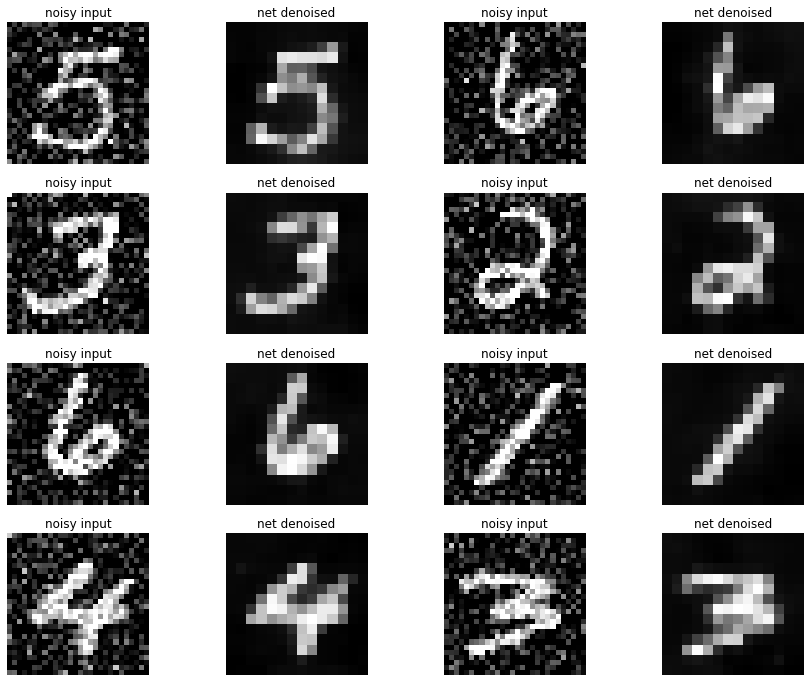

In [104]:
with torch.no_grad():
    figure = plt.figure(figsize=(15, 12))
    cols, rows =4,4
    for i in range(1, int((cols * rows)/2) + 1):
        sample_idx = torch.randint(len( test_features), size=(1,)).item()
        noisy, clean = test_features[sample_idx], test_targets[sample_idx]
        noisy = torch.from_numpy(noisy[np.newaxis, np.newaxis, :, :]).float() # np.newaxis 在NumPy中用于增加数组的维度。
        output = denoising_model(noisy)

        figure.add_subplot(rows,cols,2*i - 1)
        plt.title('noisy input')
        plt.axis("off")
        plt.imshow(noisy.squeeze(),cmap="gray")

        figure.add_subplot(rows,cols,2*i)
        plt.title('net denoised')
        plt.axis("off")
        plt.imshow(output.squeeze(),cmap="gray")